In [5]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as npl
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

# Data Loading

In [6]:
df = pd.read_csv("loan_data.csv")
df

person_age person_gender person_education  person_income  \
0            22.0        female           Master        71948.0   
1            21.0        female      High School        12282.0   
2            25.0        female      High School        12438.0   
3            23.0        female         Bachelor        79753.0   
4            24.0          male           Master        66135.0   
...           ...           ...              ...            ...   
44995        27.0          male        Associate        47971.0   
44996        37.0        female        Associate        65800.0   
44997        33.0          male        Associate        56942.0   
44998        29.0          male         Bachelor        33164.0   
44999        24.0          male      High School        51609.0   

       person_emp_exp person_home_ownership  loan_amnt        loan_intent  \
0                   0                  RENT    35000.0           PERSONAL   
1                   0                   OWN     1000.0          EDUCATION   
2                   3              MORTGAGE     5500.0            MEDICAL   
3                   0                  RENT    35000.0            MEDICAL   
4                   1                  RENT    35000.0            MEDICAL   
...               ...                   ...        ...                ...   
44995               6                  RENT    15000.0            MEDICAL   
44996              17                  RENT     9000.0    HOMEIMPROVEMENT   
44997               7                  RENT     2771.0  DEBTCONSOLIDATION   
44998               4                  RENT    12000.0          EDUCATION   
44999               1                  RENT     6665.0  DEBTCONSOLIDATION   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0              16.02                 0.49                         3.0   
1              11.14                 0.08                         2.0   
2              12.87                 0.44                         3.0   
3              15.23                 0.44                         2.0   
4              14.27                 0.53                         4.0   
...              ...                  ...                         ...   
44995          15.66                 0.31                         3.0   
44996          14.07                 0.14                        11.0   
44997          10.02                 0.05                        10.0   
44998          13.23                 0.36                         6.0   
44999          17.05                 0.13                         3.0   

       credit_score previous_loan_defaults_on_file  loan_status  
0               561                             No            1  
1               504                            Yes            0  
2               635                             No            1  
3               675                             No            1  
4               586                             No            1  
...             ...                            ...          ...  
44995           645                             No            1  
44996           621                             No            1  
44997           668                             No            1  
44998           604                             No            1  
44999           628                             No            1  

[45000 rows x 14 columns]

In [7]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [8]:
df.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
person_emp_exp                      int64
person_home_ownership              object
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [9]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [10]:
# Rename the columns 
df.columns = ['age', 'gender', 'education', 'income',
       'emp_exp', 'home', 'amnt', 'intent',
       'rate', 'percentage', 'cred_hist',
       'score', 'defaults', 'status']
df.columns
              

Index(['age', 'gender', 'education', 'income', 'emp_exp', 'home', 'amnt',
       'intent', 'rate', 'percentage', 'cred_hist', 'score', 'defaults',
       'status'],
      dtype='object')

In [11]:
# Convert categorical columns
quali = [ 'gender', 'education','home', 'intent','defaults', 'status']
quanti = ['age','income','emp_exp', 'amnt','rate', 'percentage', 'cred_hist','score']

for col in quali:
    df[col] = pd.Categorical(df[col],ordered=False)

In [12]:
df.dtypes

age            float64
gender        category
education     category
income         float64
emp_exp          int64
home          category
amnt           float64
intent        category
rate           float64
percentage     float64
cred_hist      float64
score            int64
defaults      category
status        category
dtype: object

# Data Cleaning

In [13]:
df.isnull().sum()

age           0
gender        0
education     0
income        0
emp_exp       0
home          0
amnt          0
intent        0
rate          0
percentage    0
cred_hist     0
score         0
defaults      0
status        0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

**Comment**: According to our analysis, it seems that the dataset is clean.

# Exploratory Statistics

## Uni-dimensional Study

### Categorical variable

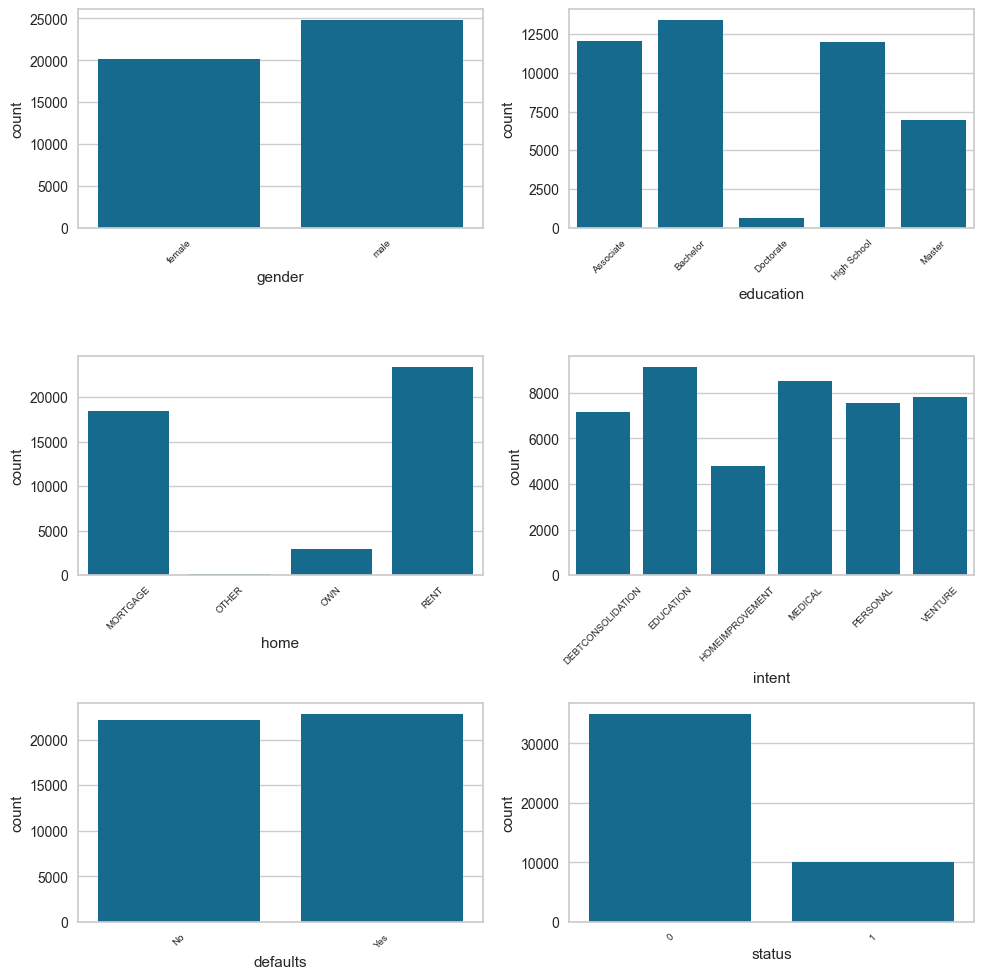

In [15]:
df_quanti = df[quanti]
import seaborn as sns
fig = plt.subplots(3,2,figsize=(10,10))
for i,col in enumerate(quali):
    plt.subplot(3,2,i+1)
    sns.barplot(df[col].value_counts())
    plt.xticks(rotation=45,fontsize=7)
plt.tight_layout()
plt.show()

### Quantitative variable

In [16]:
quanti

['age',
 'income',
 'emp_exp',
 'amnt',
 'rate',
 'percentage',
 'cred_hist',
 'score']

In [17]:
df_quanti = df[quanti]
df_quanti.head()

age   income  emp_exp     amnt   rate  percentage  cred_hist  score
0  22.0  71948.0        0  35000.0  16.02        0.49        3.0    561
1  21.0  12282.0        0   1000.0  11.14        0.08        2.0    504
2  25.0  12438.0        3   5500.0  12.87        0.44        3.0    635
3  23.0  79753.0        0  35000.0  15.23        0.44        2.0    675
4  24.0  66135.0        1  35000.0  14.27        0.53        4.0    586

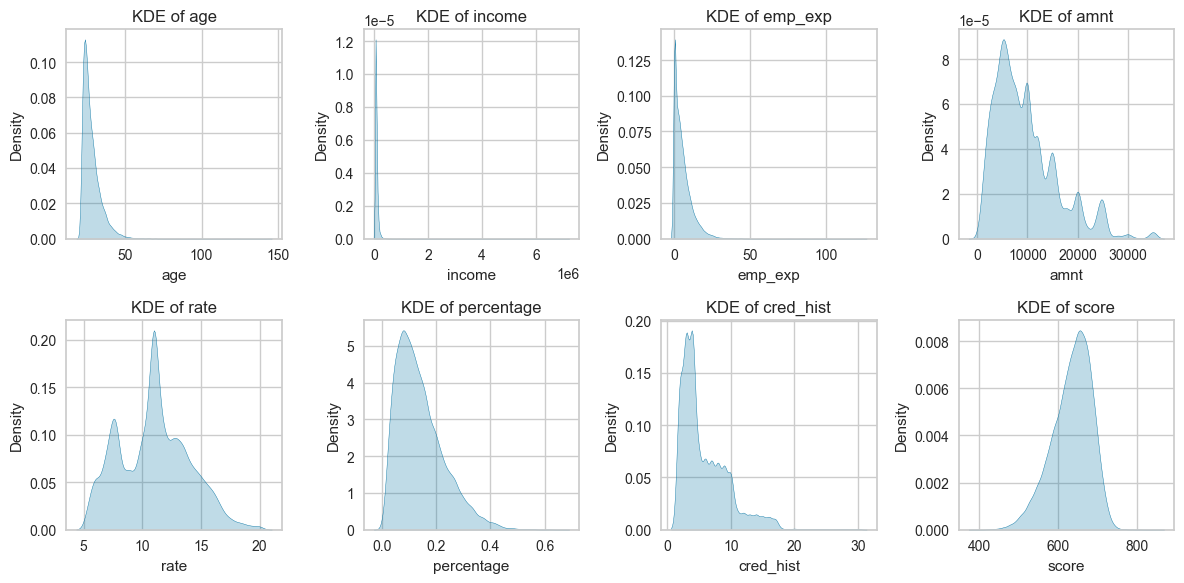

In [18]:
fig = plt.subplots(2,4,figsize=(12,6))
for i,column in enumerate(quanti):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df[column].astype('float'), fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE of {column}')
plt.tight_layout()
plt.show()

**Comment**: There are a lot of outliers for age, income and number of exprienence years.

In [19]:
df.dtypes

age            float64
gender        category
education     category
income         float64
emp_exp          int64
home          category
amnt           float64
intent        category
rate           float64
percentage     float64
cred_hist      float64
score            int64
defaults      category
status        category
dtype: object

In [20]:

df_potential_anomalies = df[['age','income','emp_exp','cred_hist']][(df['age']>90) | (df['income']>5e5) | (df['emp_exp']>80) | (df['cred_hist']>20)]


In [21]:
print(df_potential_anomalies.shape[0]/df.shape[0])

0.007711111111111111


**Comment**: As the number of "potential" anomalies is 0.7% of total dataset, removing these individuals should not impact the dataset.

In [22]:
df_clean =df.merge(df_potential_anomalies, how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

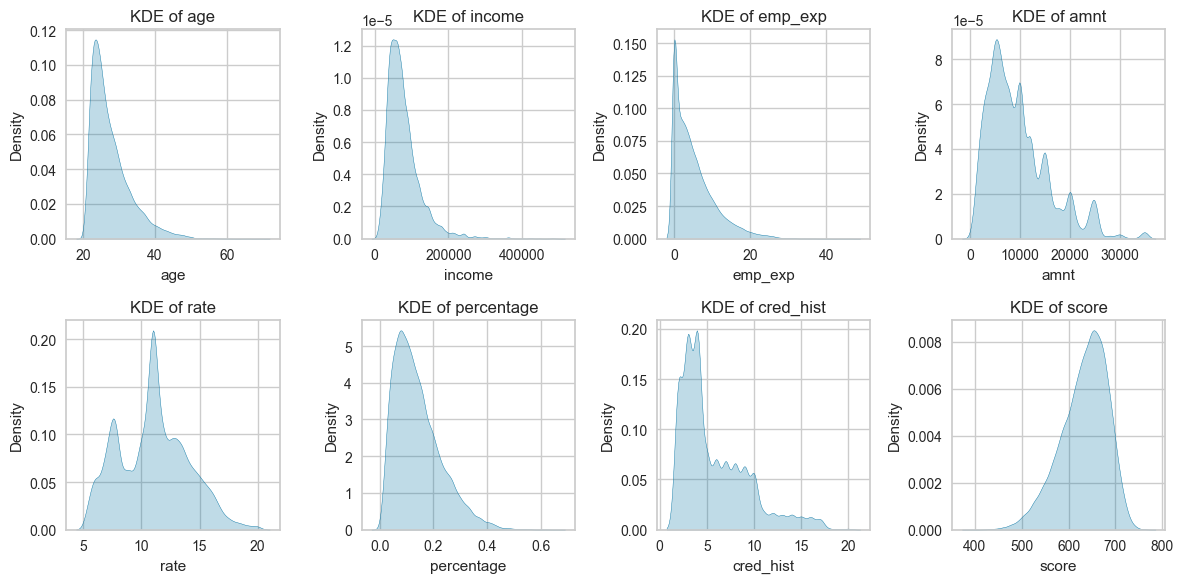

In [23]:
fig = plt.subplots(2,4,figsize=(12,6))
for i,column in enumerate(quanti):
    plt.subplot(2,4,i+1)
    sns.kdeplot(df_clean[column].astype('float'), fill=True)
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'KDE of {column}')
plt.tight_layout()
plt.show()

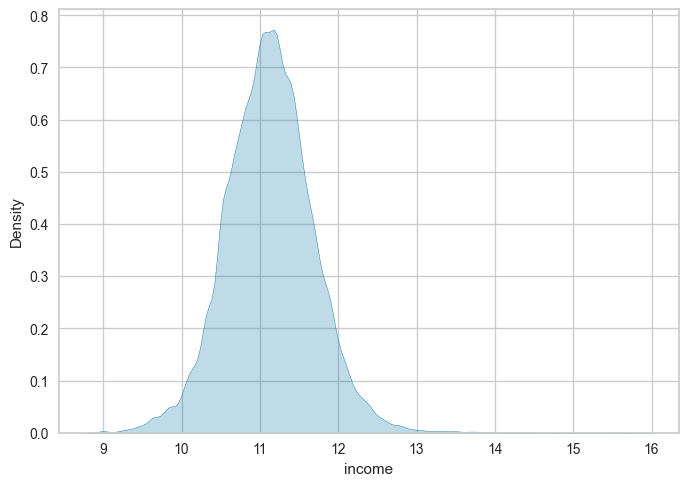

In [24]:
var = 'income'
sns.kdeplot(np.log(df[var]),label='var',fill=True)
plt.show()
df_clean['Lincome'] = np.log(df_clean['income'])
del df_clean['income']

In [25]:
df_clean.columns

Index(['age', 'gender', 'education', 'emp_exp', 'home', 'amnt', 'intent',
       'rate', 'percentage', 'cred_hist', 'score', 'defaults', 'status',
       'Lincome'],
      dtype='object')

In [26]:
quanti=['age', 'emp_exp', 'amnt','rate', 'percentage',
       'cred_hist', 'score','Lincome']

## Multi-dimensional Study

### Categorical vs Categorical

In [23]:
print(quali)

['gender', 'education', 'home', 'intent', 'defaults', 'status']


#### CA (Correspondence Analysis)
Correspondance analysis measures the 

#### CA - Khi2 independence tests

#### MCA (multiple correspendence analysis)


In [24]:
df_quali=df_clean[quali]
df_quali.set_index('status')


gender    education      home             intent defaults
status                                                           
1       female       Master      RENT           PERSONAL       No
0       female  High School       OWN          EDUCATION      Yes
1       female  High School  MORTGAGE            MEDICAL       No
1       female     Bachelor      RENT            MEDICAL       No
1         male       Master      RENT            MEDICAL       No
...        ...          ...       ...                ...      ...
1         male    Associate      RENT            MEDICAL       No
1       female    Associate      RENT    HOMEIMPROVEMENT       No
1         male    Associate      RENT  DEBTCONSOLIDATION       No
1         male     Bachelor      RENT          EDUCATION       No
1         male  High School      RENT  DEBTCONSOLIDATION       No

[44653 rows x 5 columns]

Multiple Correspondance Analysis (MCA) is a data analysis technique for reducing dimensionality among qualitative variables.
It can minimize intra class variance and maximize inter class variance. It is similar to the Principle Components Analysis (PCA), but uses a definition of the distance between individuals and between classes that takes into consideration the rarity of the class.

In [25]:
count=0 #21
for q in quali:
    if q!="status":
        print(df_quali[q].value_counts())
        print("-------")

gender
male      24611
female    20042
Name: count, dtype: int64
-------
education
Bachelor       13323
Associate      11924
High School    11858
Master          6945
Doctorate        603
Name: count, dtype: int64
-------
home
RENT        23269
MORTGAGE    18339
OWN          2930
OTHER         115
Name: count, dtype: int64
-------
intent
EDUCATION            9117
MEDICAL              8478
VENTURE              7782
PERSONAL             7428
DEBTCONSOLIDATION    7090
HOMEIMPROVEMENT      4758
Name: count, dtype: int64
-------
defaults
Yes    22706
No     21947
Name: count, dtype: int64
-------


In [26]:
import prince
mca = prince.MCA(
    n_components=20,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

df_quali_no_status = df_quali.drop('status',axis=1)
mca = mca.fit(df_quali_no_status)

In [27]:
print(mca.eigenvalues_)
print(mca.percentage_of_variance_)

[2.42258392e-01 2.17748636e-01 2.09123946e-01 2.03678516e-01
 2.01274159e-01 2.00845351e-01 2.00258423e-01 1.99015251e-01
 1.98388149e-01 1.97468817e-01 1.94712184e-01 1.93344083e-01
 1.75382996e-01 1.66501098e-01 3.22006966e-33 2.77247896e-34
 4.87375235e-35 2.02652324e-36]
[8.65208543e+00 7.77673699e+00 7.46871234e+00 7.27423270e+00
 7.18836284e+00 7.17304824e+00 7.15208653e+00 7.10768754e+00
 7.08529102e+00 7.05245774e+00 6.95400657e+00 6.90514584e+00
 6.26367845e+00 5.94646777e+00 1.15002488e-31 9.90171058e-33
 1.74062584e-33 7.23758302e-35]


In [28]:
help(prince.MCA)

Help on class MCA in module prince.mca:

class MCA(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin, prince.ca.CA)
 |  MCA(
 |      n_components=2,
 |      n_iter=10,
 |      copy=True,
 |      check_input=True,
 |      random_state=None,
 |      engine='sklearn',
 |      one_hot=True,
 |      correction=None
 |  )
 |
 |  Method resolution order:
 |      MCA
 |      sklearn.base.BaseEstimator
 |      sklearn.utils._estimator_html_repr._HTMLDocumentationLinkMixin
 |      sklearn.utils._metadata_requests._MetadataRequester
 |      sklearn.base.TransformerMixin
 |      sklearn.utils._set_output._SetOutputMixin
 |      prince.ca.CA
 |      prince.utils.EigenvaluesMixin
 |      builtins.object
 |
 |  Methods defined here:
 |
 |  __init__(
 |      self,
 |      n_components=2,
 |      n_iter=10,
 |      copy=True,
 |      check_input=True,
 |      random_state=None,
 |      engine='sklearn',
 |      one_hot=True,
 |      correction=None
 |  )
 |      Initialize self.  See help(type(

In [29]:
display(mca.eigenvalues_summary)

mca.scree_plot()

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.242         8.65%                      8.65%
1              0.218         7.78%                     16.43%
2              0.209         7.47%                     23.90%
3              0.204         7.27%                     31.17%
4              0.201         7.19%                     38.36%
5              0.201         7.17%                     45.53%
6              0.200         7.15%                     52.69%
7              0.199         7.11%                     59.79%
8              0.198         7.09%                     66.88%
9              0.197         7.05%                     73.93%
10             0.195         6.95%                     80.88%
11             0.193         6.91%                     87.79%
12             0.175         6.26%                     94.05%
13             0.167         5.95%                    100.00%
14             0.000         0.00%                    100.00%
15             0.000         0.00%                    100.00%
16             0.000         0.00%                    100.00%
17             0.000         0.00%                    100.00%

alt.Chart(...)

In [30]:
def plot_mca(ax1=0, ax2=1, mca=mca, data=df_quali_no_status,color='status'):
    dataset = mca.transform(data)
    dataset.reset_index(inplace=True)
    sns.scatterplot(data = dataset,
                  x = ax1, y = ax2,
                  hue = df_quali[color])
    
    plt.xlabel('Component {} — {:.2f}%'.format(ax1, mca.percentage_of_variance_[ax1]))
    plt.ylabel('Component {} — {:.2f}%'.format(ax2, mca.percentage_of_variance_[ax2]))
    plt.grid(True)
    plt.show()

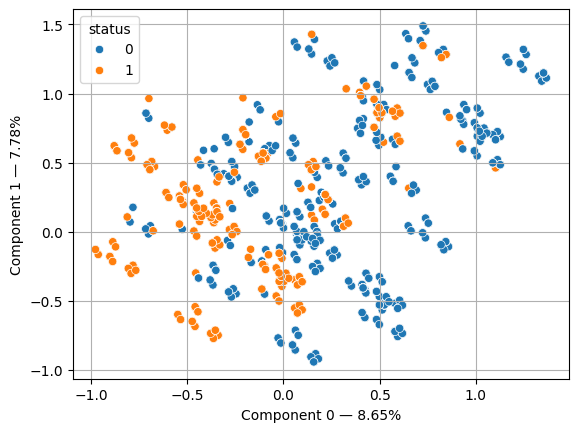

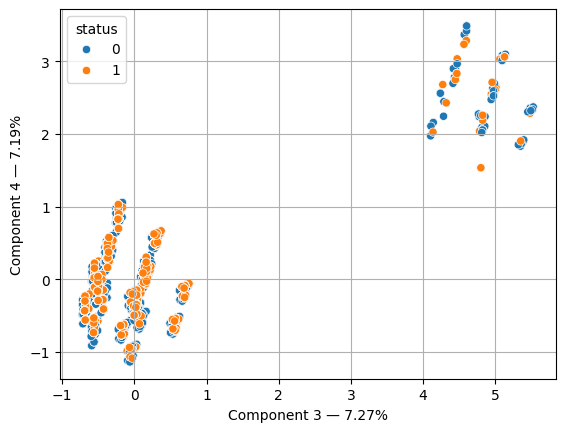

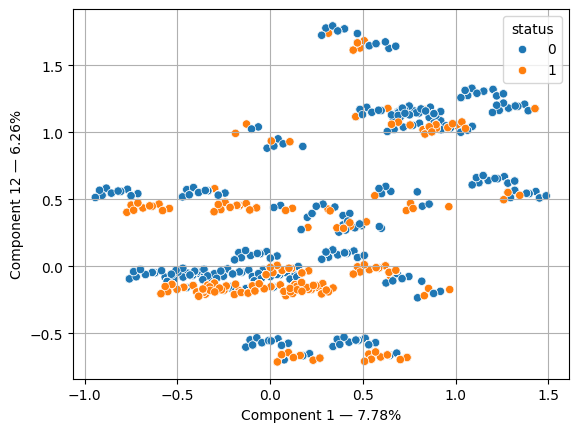

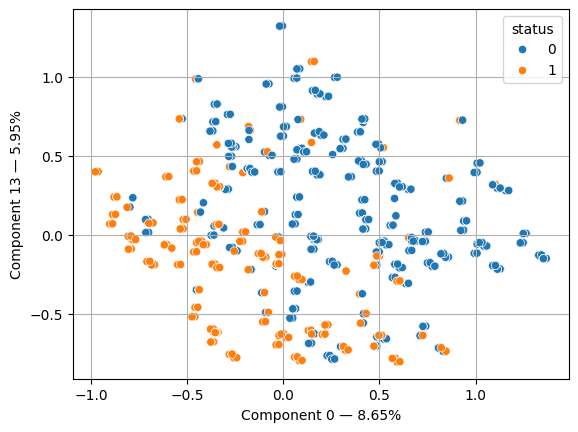

In [31]:
plot_mca(0,1)
plot_mca(3,4)
plot_mca(1,12)
plot_mca(0,13)

An observation on plane generated by components 0 and 13 shows that loan_status_yes and loan_status_no are resonably separable.

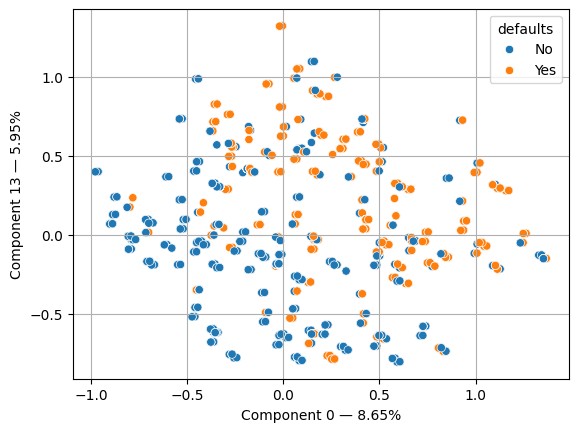

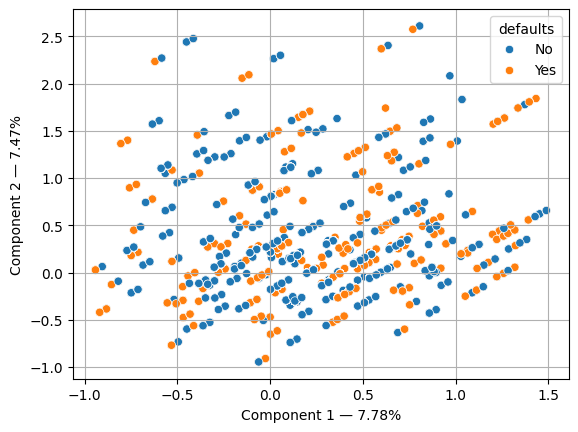

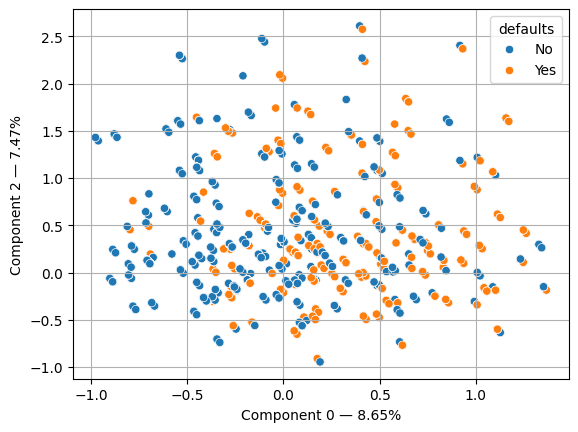

In [32]:
plot_mca(0,13,color = 'defaults' )
plot_mca(1,2,color = 'defaults')
plot_mca(0,2,color = 'defaults')

An observation on plane generated by components 0,1 and 0,2 show that previous_loan_defaults_yes and previous_loan_defaults_no are well separable.

In [33]:
# Contribution of columns to components

contrib = mca.column_contributions_.style.format('{:.1%}')
display(contrib.highlight_max(color='orange').highlight_min(color='lightblue'))

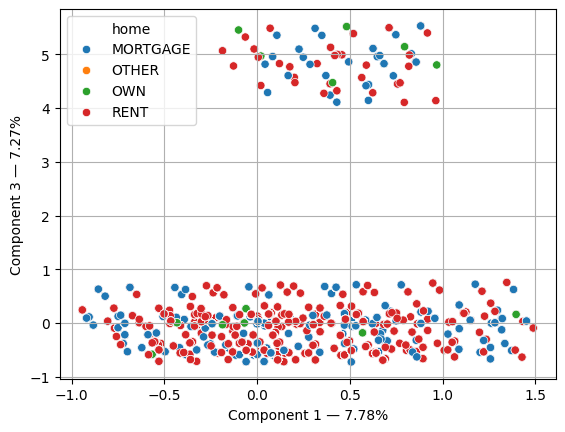

In [34]:
plot_mca(1,3,color='home')

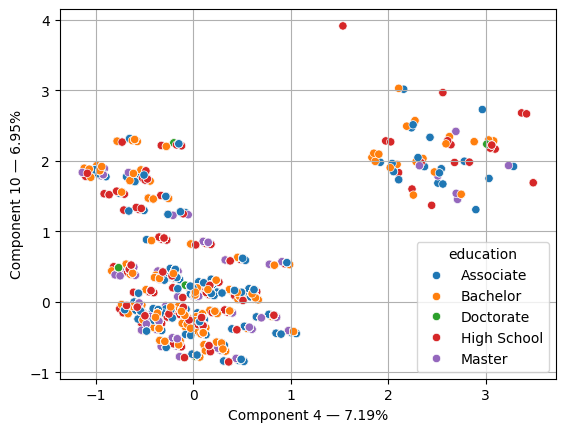

In [35]:
plot_mca(4,10,color='education')

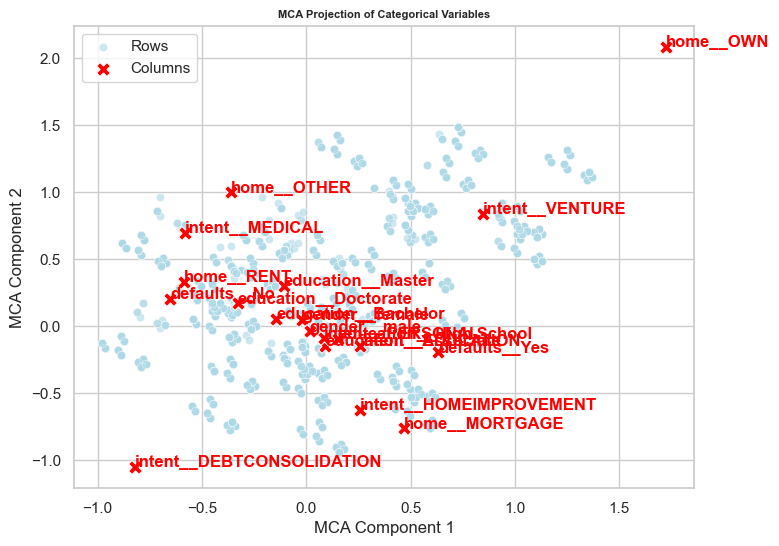

In [36]:

# Get transformed row and column coordinates
row_coords = mca.transform(df_quali_no_status)
col_coords = mca.column_coordinates(df_quali_no_status)

# Create a Seaborn scatterplot
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot row coordinates (individuals)
sns.scatterplot(x=row_coords[0], y=row_coords[1], color="lightblue", label="Rows", alpha=0.6)

# Plot column coordinates (categories)
sns.scatterplot(x=col_coords[0], y=col_coords[1], color="red", marker="X", label="Columns", s=100)

# Annotate column coordinates (categories)
for i, col in enumerate(col_coords.index):
    plt.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], col, color='red', fontsize=12, fontweight='bold')

# Customize plot
plt.title("MCA Projection of Categorical Variables", fontsize=8, fontweight="bold")
plt.xlabel("MCA Component 1", fontsize=12)
plt.ylabel("MCA Component 2", fontsize=12)
plt.legend()
plt.show()


In [37]:
quanti

['age',
 'emp_exp',
 'amnt',
 'rate',
 'percentage',
 'cred_hist',
 'score',
 'Lincome']

### Quantitative vs Quantitative

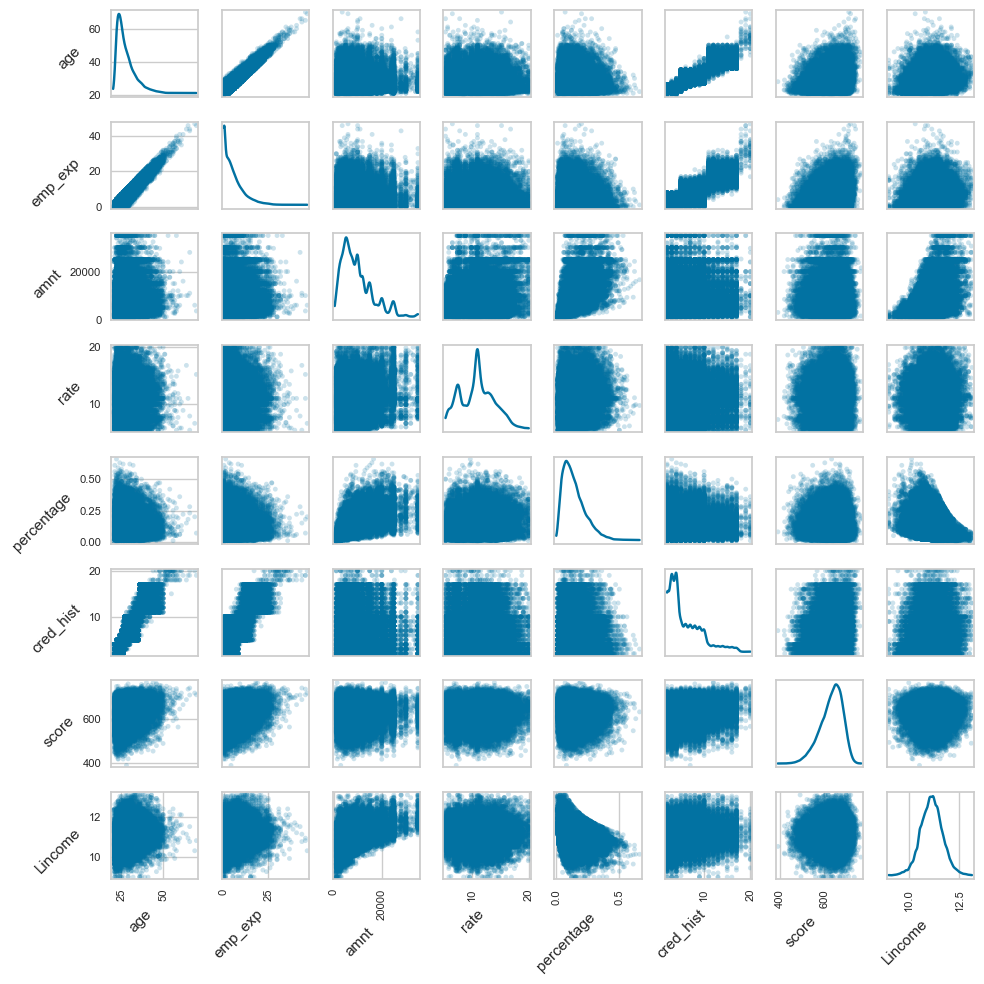

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'gym' is your DataFrame
from pandas.plotting import scatter_matrix

df_quanti = df_clean[quanti]

# Create the scatter matrix
sm = scatter_matrix(df_quanti,
              alpha=0.2,
              diagonal='kde',
              figsize=(10,10))

# Get the current figure
fig = plt.gcf()

# Loop through all axes in the figure
for ax in fig.axes:
    # Rotate the variable names on the diagonal plots
    if ax.get_title():
        ax.set_title(ax.get_title(), rotation=45, ha='right')

    # Rotate the variable names on the off-diagonal plots
    if ax.get_xlabel():
        ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    if ax.get_ylabel():
        ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

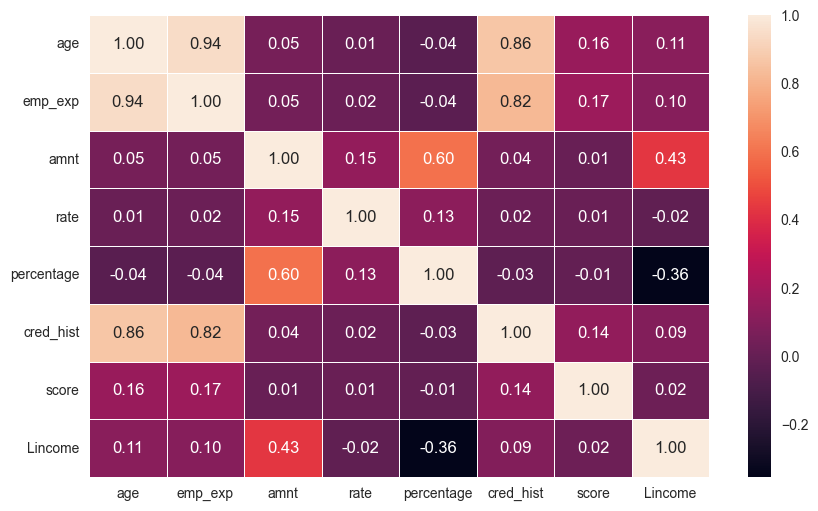

In [31]:
# Correlation matrix 

corr = df_quanti.corr()

plt.figure(figsize = (10,6))
sns.heatmap(corr, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

**Comment**: Age, emp_exp, cred_hist are strongly correlated triplet.

#### Principal Component Analysis

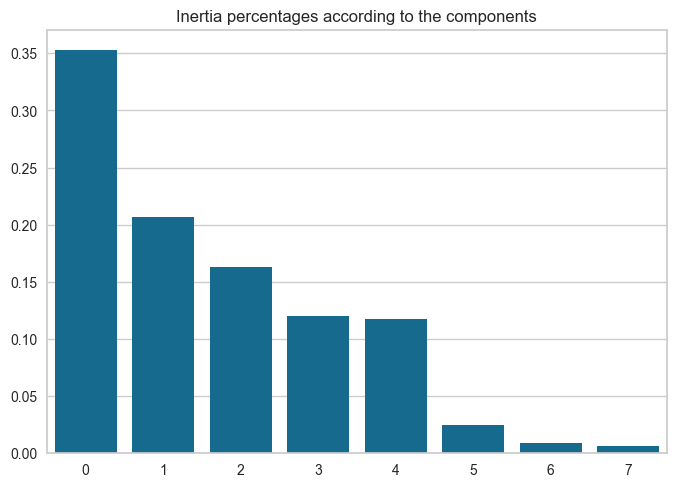

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X_scaled = scale(df_quanti)

pca = PCA()
X_pca = pca.fit(X_scaled).transform(X_scaled)

# Plot of inertia percentage according to the components
sns.barplot(pca.explained_variance_ratio_)
plt.title('Inertia percentages according to the components')
plt.show()

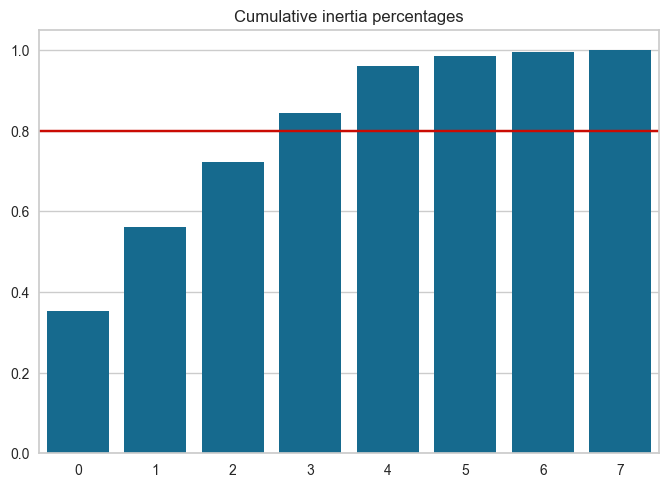

In [33]:
# Plot of cumulative variance

sns.barplot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.8,color='r',linestyle='-')
plt.title('Cumulative inertia percentages')
plt.show()

**Comment**: We can keep 80% of inertia by observing the first four components.

<Axes: ylabel='Density'>

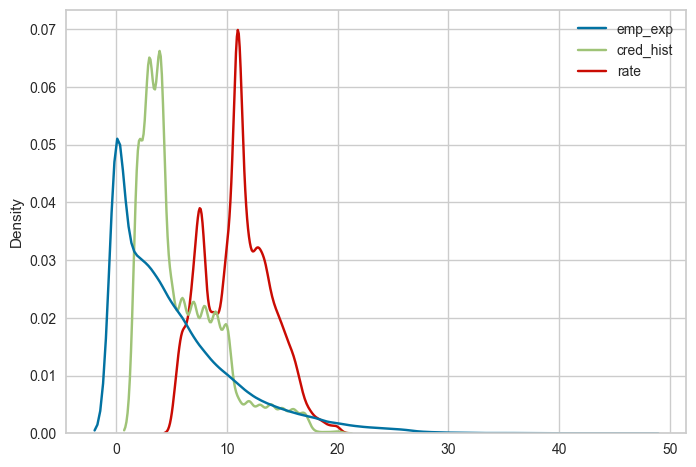

In [34]:
sns.kdeplot(df_clean[['emp_exp','cred_hist','rate']],legend=True)

##### Representation of individuals on pca components

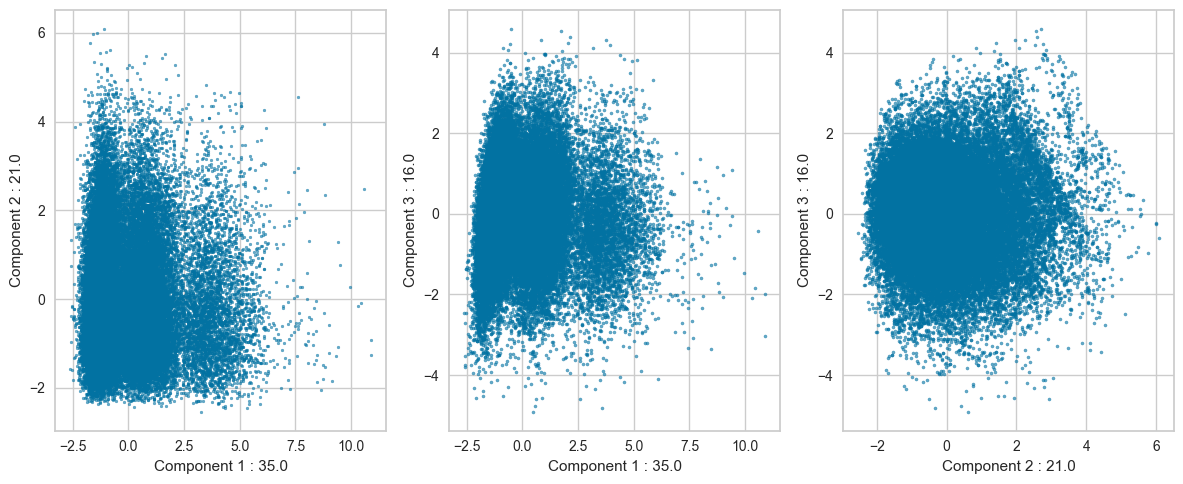

In [35]:

fig,axs = plt.subplots(1,3,figsize=(12,5))

axs[0].scatter(X_pca[:,0],X_pca[:,1],alpha=0.6, s=4)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],alpha=0.6, s=5)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],alpha=0.6, s=5)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

plt.tight_layout()
plt.show()

#### Representation of individuals on pca components - cos2 coloring

In [36]:
row_sums = (X_scaled ** 2).sum(axis=1)
ind_cos2 = (X_pca ** 2)/row_sums[:,np.newaxis]
ind_cos2.shape

(44653, 8)

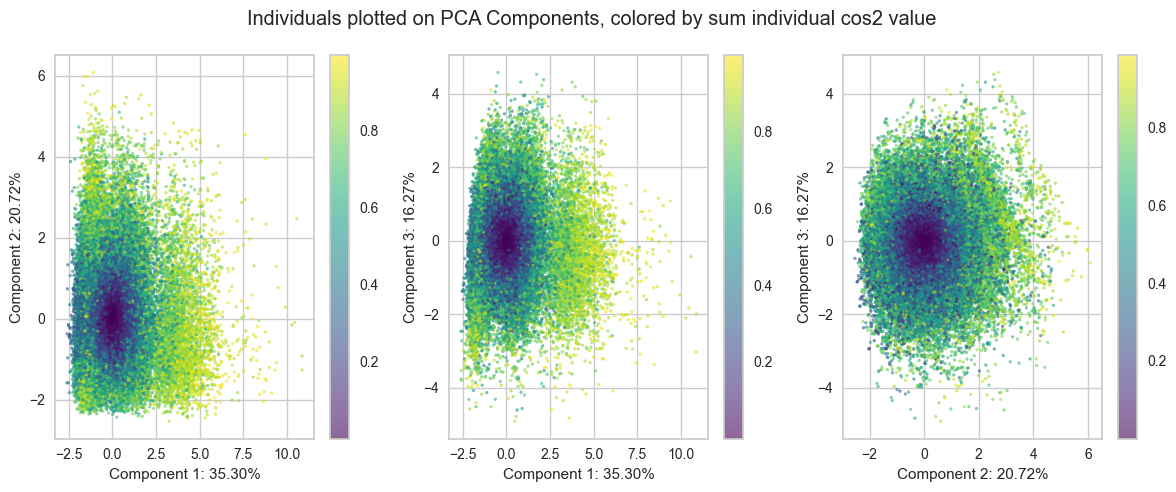

In [37]:
fig, axs = plt.subplots(1,3,figsize=(12,5))

scatter1 = axs[0].scatter(X_pca[:,0], X_pca[:,1], c = ind_cos2[:,0] + ind_cos2[:,1], cmap="viridis", alpha = 0.6, s = 4)
axs[0].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[0].set_ylabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")

scatter2 = axs[1].scatter(X_pca[:,0], X_pca[:,2], c = ind_cos2[:,0] + ind_cos2[:,2], cmap="viridis", alpha = 0.6, s = 4)
axs[1].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[1].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

scatter3 = axs[2].scatter(X_pca[:,1], X_pca[:,2], c = ind_cos2[:,1] + ind_cos2[:,2], cmap="viridis", alpha = 0.6, s = 4)
axs[2].set_xlabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")
axs[2].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

plt.colorbar(scatter1)
plt.colorbar(scatter2)
plt.colorbar(scatter3)

fig.suptitle("Individuals plotted on PCA Components, colored by sum individual cos2 value")
plt.tight_layout()
plt.show()

#### Representation of individuals on pca components - residual cos2 coloring

In [38]:
cols = np.array([i for i in range(8)])
print(cols)
f = lambda x,y: np.delete(cols, np.where((cols==x) | (cols==y)))
F = lambda x,y: ind_cos2[:,f(x,y)].sum(axis=1)

[0 1 2 3 4 5 6 7]


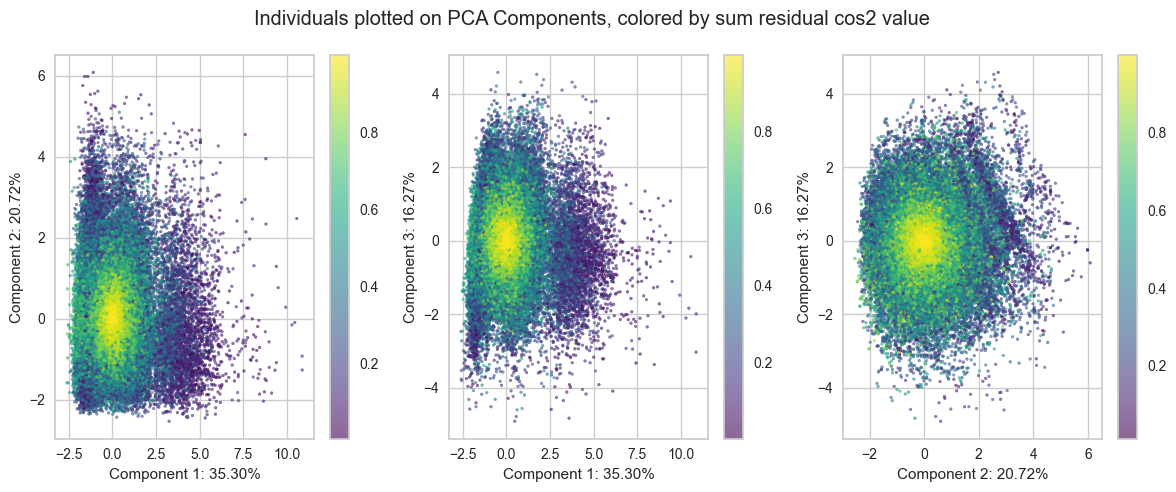

In [39]:
fig, axs = plt.subplots(1,3,figsize=(12,5))

scatter1 = axs[0].scatter(X_pca[:,0], X_pca[:,1], c = F(0,1), cmap="viridis", alpha = 0.6, s = 4)
axs[0].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[0].set_ylabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")

scatter2 = axs[1].scatter(X_pca[:,0], X_pca[:,2], c = F(0,2), cmap="viridis", alpha = 0.6, s = 4)
axs[1].set_xlabel(f"Component 1: {pca.explained_variance_ratio_[0]:.2%}")
axs[1].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

scatter3 = axs[2].scatter(X_pca[:,1], X_pca[:,2], c = F(1,2), cmap="viridis", alpha = 0.6, s = 4)
axs[2].set_xlabel(f"Component 2: {pca.explained_variance_ratio_[1]:.2%}")
axs[2].set_ylabel(f"Component 3: {pca.explained_variance_ratio_[2]:.2%}")

plt.colorbar(scatter1)
plt.colorbar(scatter2)
plt.colorbar(scatter3)

fig.suptitle("Individuals plotted on PCA Components, colored by sum residual cos2 value")
plt.tight_layout()
plt.show()

**Conclusion:** Although coloring based on individual cos2 value seemed like an interesting idea, it proved not that insightful, as indivuals close to the origin showed a small cos2 value meaning they where not well represented. Likewise, well represented data points, at the far ends of the "cloud" showed a small residual cos2 value, because the information had already been captured by the PCA components.

#### Representation of individuals on PCA components - coloring by qualitative class belonging

In [40]:
print(f"We will color the datapoints based on : {df_quali.columns.to_list()}")

NameError: name 'df_quali' is not defined

In [ ]:
# color according to gender
male_idx = df_quali['gender'] =='male'
plt.figure(figsize=(10,5))
plt.scatter(X_pca[male_idx,0],X_pca[male_idx,1],label='male',alpha=0.6, s=2)
plt.scatter(X_pca[~male_idx,0],X_pca[~male_idx,1],label='female',alpha=0.6, s=2)
plt.legend()
plt.show()

In [ ]:
df['defaults'].unique()

In [ ]:
# color according to defaults

defaut_idx = df_quali['defaults'] =='Yes'
plt.figure(figsize=(10,5))
plt.scatter(X_pca[defaut_idx,0],X_pca[defaut_idx,1],label='Yes',alpha=0.6, s=2)
plt.scatter(X_pca[~defaut_idx,0],X_pca[~defaut_idx,1],label='No',alpha=0.6, s=2)
plt.legend()
plt.show()

In [ ]:
# color according to status

status_idx = df_quali['status'] ==1
plt.figure(figsize=(10,5))
plt.scatter(X_pca[status_idx,0],X_pca[status_idx,1],label='Yes',alpha=0.6, s=1)
plt.scatter(X_pca[~status_idx,0],X_pca[~status_idx,1],label='No',alpha=0.6, s=1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
for home in df_quali['home'].unique():
    idx = df_quali['home']==home
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=home,alpha=0.6, s=1)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
for intent in df_quali['intent'].unique():
    idx = df_quali['intent']==intent
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=intent,alpha=0.6, s=1)

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
for edu in df_quali['education'].unique():
    idx = df_quali['education']==edu
    plt.scatter(X_pca[idx,0],X_pca[idx,1],label=edu,alpha=0.3, s=5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.legend()
plt.show()

##### Representation of Variables

In [ ]:

# plt.figure(figsize = (10,6))
# sns.heatmap(pca.components_, annot = True, fmt='.2f',linewidths=0.5)
# plt.show()

loadings = pd.DataFrame(
    pca.components_, 
    columns=quanti, 
    index=[f"PC{i+1} ({pca.explained_variance_ratio_[i]:.2%})" for i in range(pca.n_components_)]
)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    loadings, 
    annot=True, 
    fmt='.2f', 
    linewidths=0.5, 
    # cmap="coolwarm",  # Diverging colormap
    center=0  # Emphasize positive & negative values
)

# Improve aesthetics
plt.title("PCA Loadings (Linear Combinations of Original Features)", fontsize=14)
plt.xlabel("Original Features", fontsize=12)
plt.ylabel("Principal Components", fontsize=12)
plt.xticks(rotation=45)  # Rotate feature names for readability
plt.yticks(rotation=0) # rotate horizontally


# Show plot
plt.show()

**Interpretation**: The above matrix shows the composition of the different features in our Principal Components (PCs). The first PC is the one that best explains the variance in our dataset, the second the second best, and so on. Our first order of business is to comment on the ratio of variance explained by the different PCs. 
### Variance explained
More than half (~56%) of the dataset's quantitative variance can be explained using the first two PCs. Including the next two components, we get a satisfactory explained variance ratio of more than 80% (~84%). Upon first glance, it would seem that the first two PCs give a lot of the information, while the two next PCs provide the details. 

### PC composition
1. The first PC is primarily positively correlated with *Age*, *Employment Experience*, and *Credit History*. It also has a small, positive correlation with the variables *Credit Score* and *Income*. It would seem to capture the **financial stability** of a client.
2. The second PC is primarily positively correltaed with *Loan Amount* and *Loan Percentage of Income*. It is also moderately positively correlated with *Interest Rate*. This PC seems to capture the **loan-side information**, contrary to the first PC. It should not come as a surprise that these two PCs capture a large amount of the information.
3. The third PC is primarily positively correlated with the *Income* variable*, as well as the *Loan Amount* (positively) and *Loan Percentage of Income* (negatively), but in a more moderate way. It would seem like this PC captures the relationship between the client's income and the loan. This further strengthens the idea of two primary and two complementary PCs.
4. The fourth PC is primarily postively correlated with the *Credit Score* variable, as well as moderately positively correlated with the *Interest Rate*. Both of these variables have no major correlation with any of the other variables (ref. correlation matrix), so it would seem this PC captures some of the information left out by the previous PCs, although a precise interpretation is though to come by.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text

# Compute coordinates for the PCA vectors
coord0 = pca.components_[0] * np.sqrt(pca.explained_variance_[0])
coord1 = pca.components_[1] * np.sqrt(pca.explained_variance_[1])

# Create figure and axis
fig, ax = plt.subplots(figsize=(7, 7))

# Store text objects for adjustment
texts = []

# Plot vectors with labels
for i, j, nom in zip(coord0, coord1, quanti):
    plt.arrow(0, 0, i, j, color='red', alpha=0.7, head_width=0.03, head_length=0.03, linewidth=1.2)
    text = plt.text(i, j, nom, fontsize=12, ha='center', va='center', 
                    bbox=dict(facecolor='white', edgecolor='black', alpha=0.7))
    texts.append(text)

# Adjust text positions to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray', lw=0.5))

# Add unit circle
circle = plt.Circle((0, 0), radius=1.0, color='black', fill=False, linestyle='dashed', alpha=0.7)
ax.add_patch(circle)

# Set axis limits and labels
ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)
ax.set


**Comment**: The variable presentation on pca plane confirms our previous observation that cred_hist, emp_exp, and age are strongly correlated; moreover, we also remark that these 3 variables seem to be independent from amnt, percentage, and rate.

### Quantitative vs Categorical

In [ ]:
len(quanti)

Boxplot of all quantitative variables according to gender


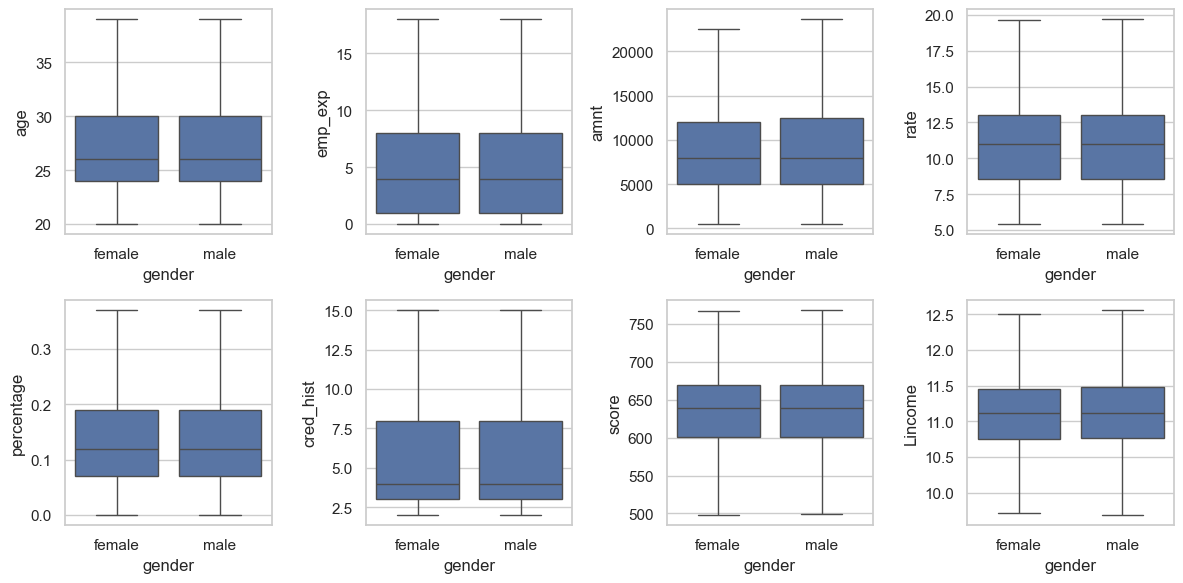

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to education


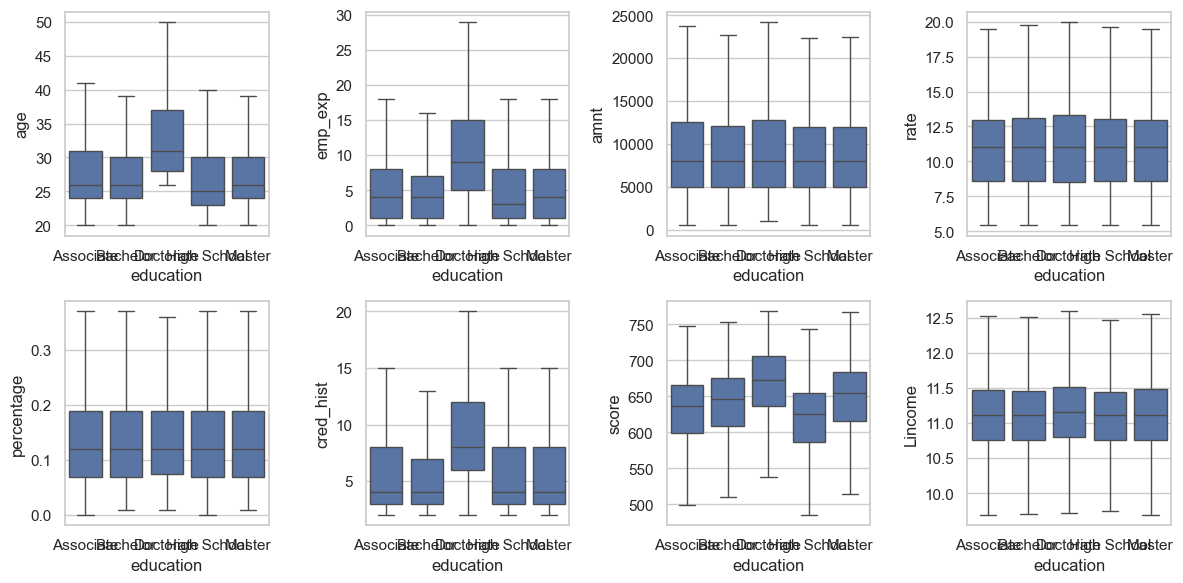

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to home


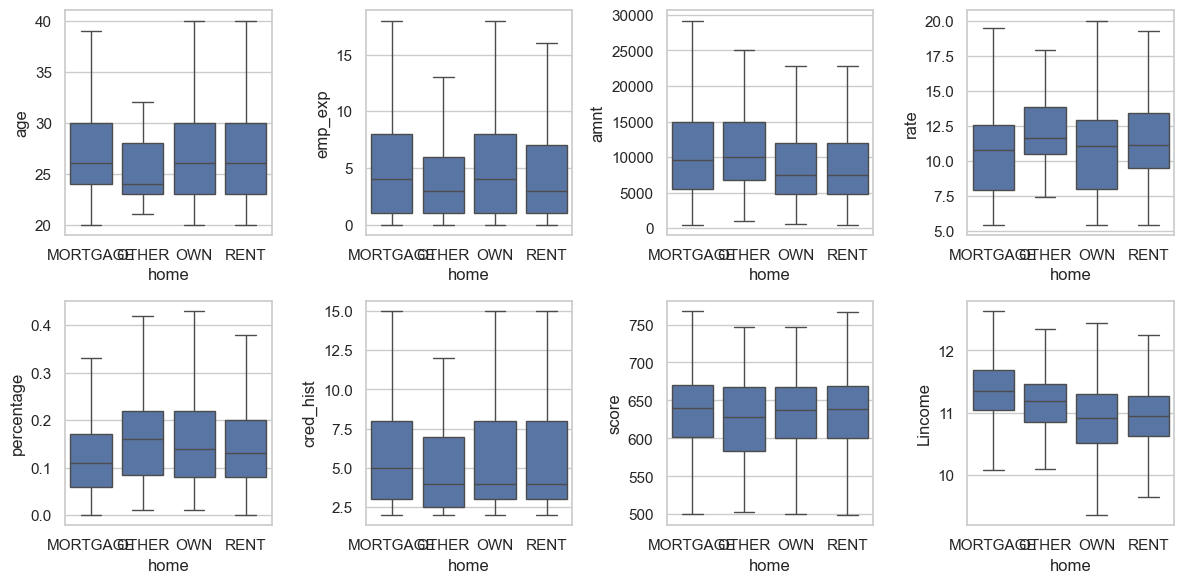

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to intent


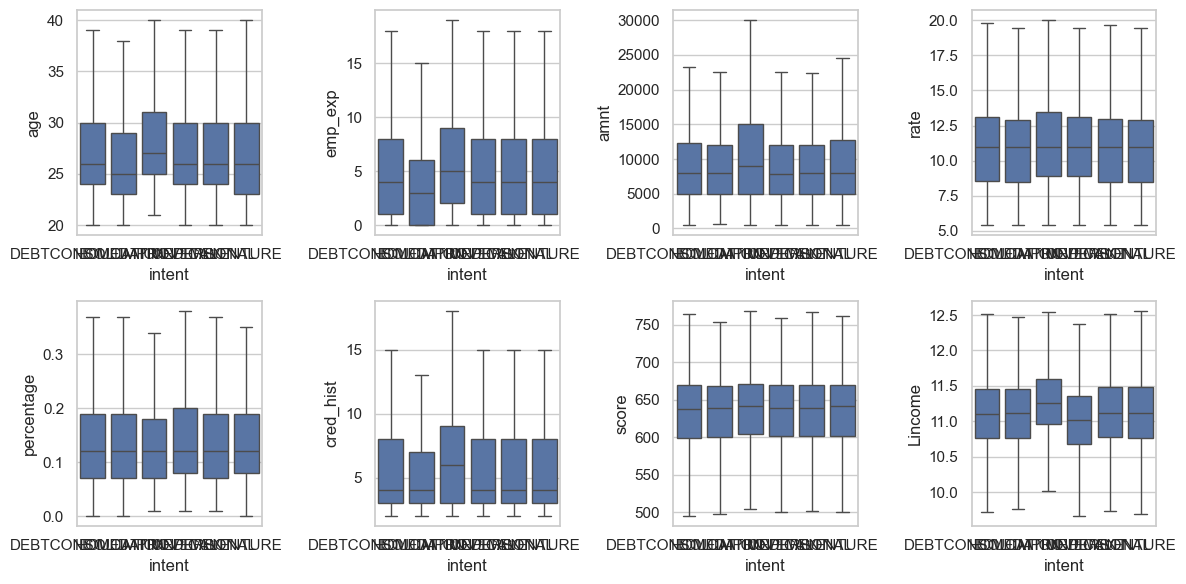

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to defaults


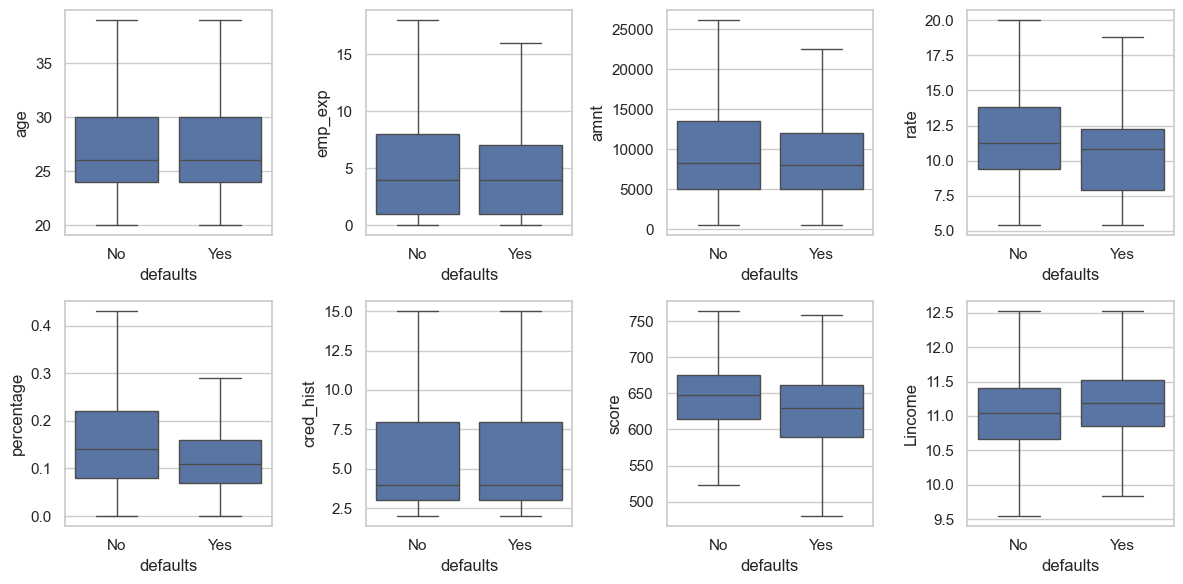

-----------------------------------------------------------------------------------
Boxplot of all quantitative variables according to status


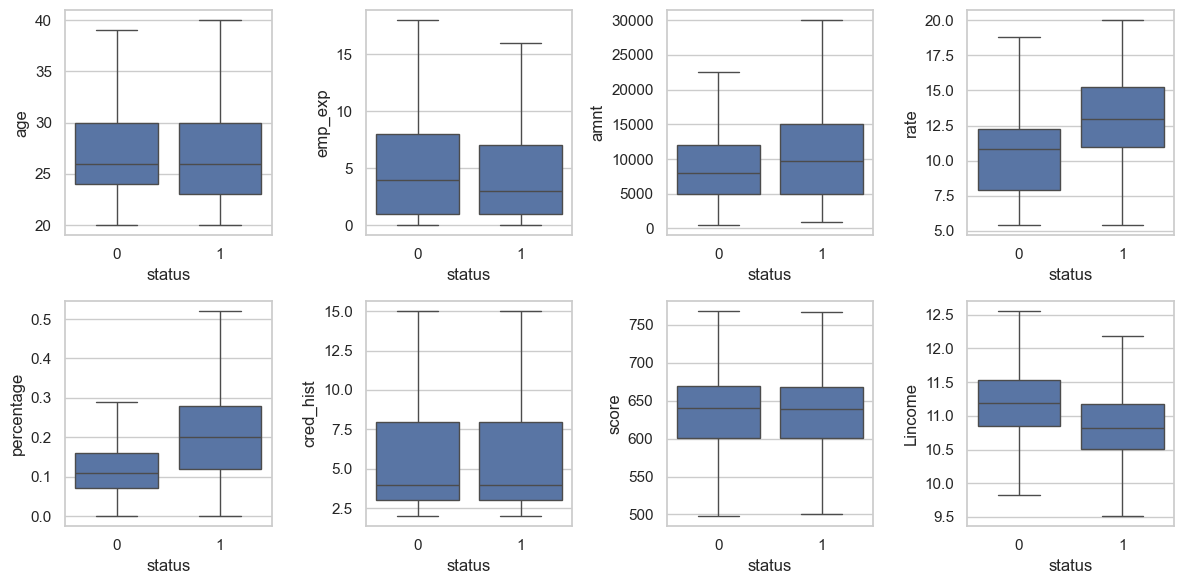

-----------------------------------------------------------------------------------


In [51]:

for i in range(len(quali)):
    print(f"Boxplot of all quantitative variables according to {quali[i]}")
    fig, axes = plt.subplots(2,4,figsize=(12,6))
    axes = np.ravel(axes)
    for j in range(len(quanti)):
        sns.boxplot(x=quali[i],y=quanti[j],data=df_clean,showfliers=False,ax=axes[j])
#         axes[j].set_title(f"{quanti[j]} vs {quali[i]}")
        # axes[j].axis('off')
    plt.tight_layout()
    plt.show()
    print ("-----------------------------------------------------------------------------------")

**Comment**: I propose to perform MFA

## LDA

In [58]:
df_quali

gender    education      home             intent defaults status
0      female       Master      RENT           PERSONAL       No      1
1      female  High School       OWN          EDUCATION      Yes      0
2      female  High School  MORTGAGE            MEDICAL       No      1
3      female     Bachelor      RENT            MEDICAL       No      1
4        male       Master      RENT            MEDICAL       No      1
...       ...          ...       ...                ...      ...    ...
44995    male    Associate      RENT            MEDICAL       No      1
44996  female    Associate      RENT    HOMEIMPROVEMENT       No      1
44997    male    Associate      RENT  DEBTCONSOLIDATION       No      1
44998    male     Bachelor      RENT          EDUCATION       No      1
44999    male  High School      RENT  DEBTCONSOLIDATION       No      1

[44653 rows x 6 columns]

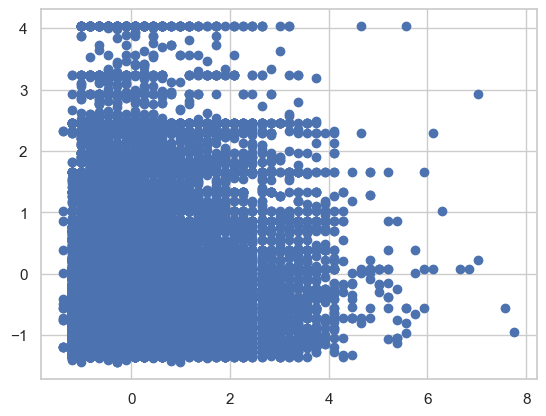

In [179]:
plt.scatter(X_scaled[:,0],X_scaled[:,2])

In [58]:
import sklearn
help(sklearn)

Help on package sklearn:

NAME
    sklearn - Configure global settings and get information about the working environment.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _built_with_meson
    _config
    _distributor_init
    _isotonic
    _loss (package)
    _min_dependencies
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
    feature_extraction (package)
    feature_selection (package)
    frozen (package)
    gaussian_process (package)
    impute (package)
    inspection (package)
    isotonic
    kernel_approximation
    kernel_ridge
    linear_model (package)
    manifold (package)
    metrics (package)
    mixture (package)
    model_selection (package)
    multiclass
    multioutput
   

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



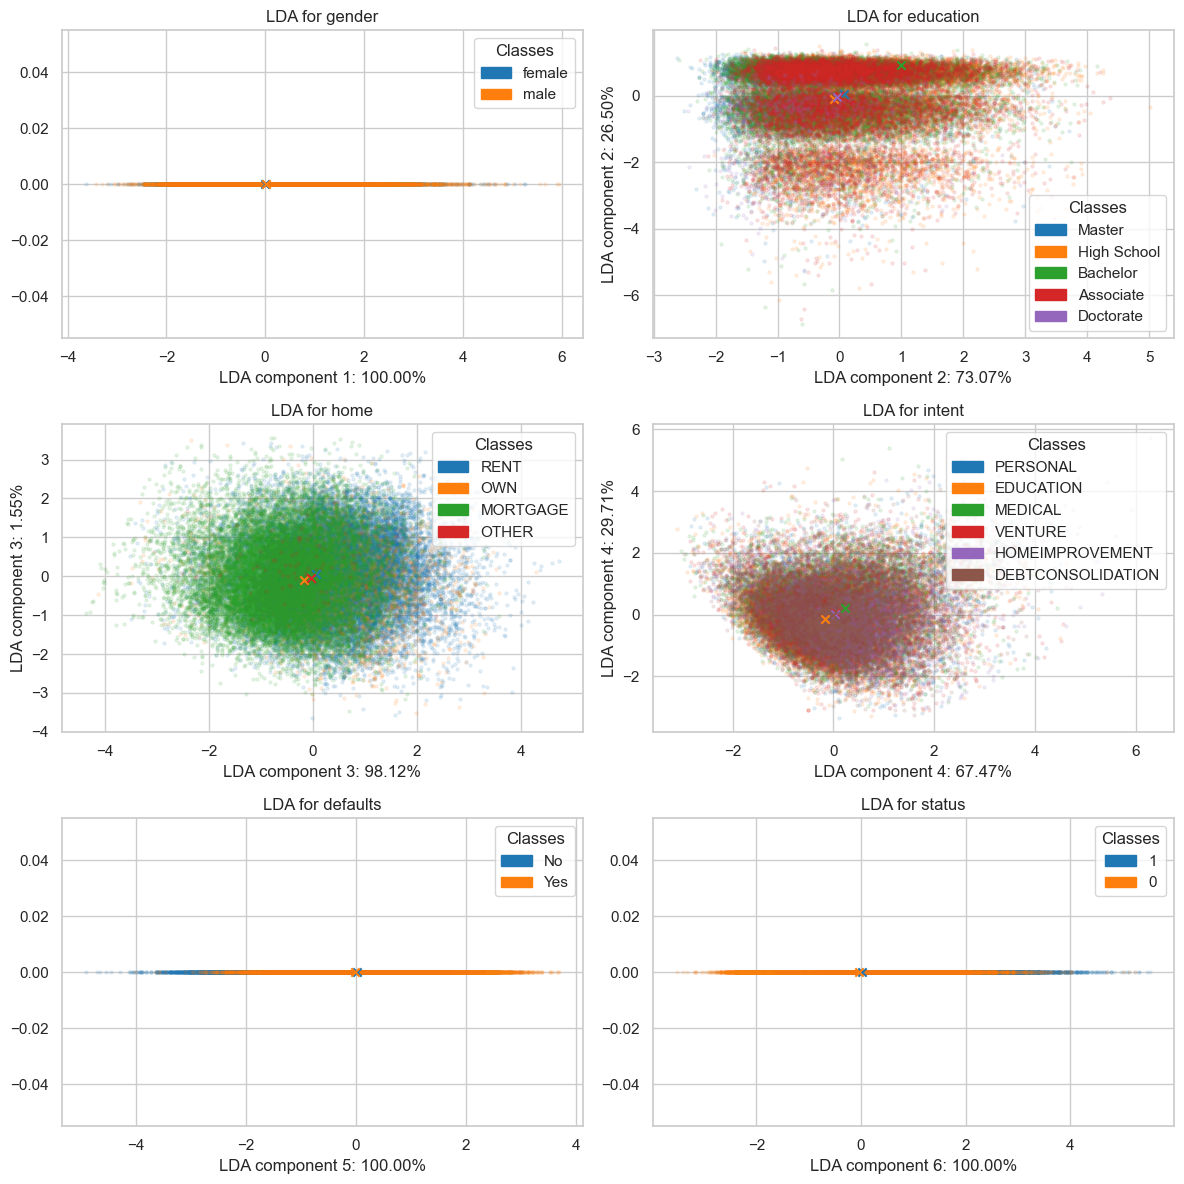

In [224]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from matplotlib.patches import Patch

cmap = plt.get_cmap('tab10')
l = df_quali.shape[1]
fig, axs = plt.subplots(l//2, 2, figsize=(12,12))

for i,quali_column in enumerate(df_quali.columns.to_list()):

    y = df_quali[quali_column]
    is_uni = len(y.unique())<=2
    lda = LinearDiscriminantAnalysis(store_covariance=True)
    X_lda = lda.fit_transform(X_scaled, y)

    legend_handles = [
    Patch(color=cmap.colors[i], label=feature, alpha=1)
    for i,feature in enumerate(y.unique())
    ]
    
    for j,feature in enumerate(y.unique()):
        idx = df_quali[quali_column]==feature
        n_idx = len(X_lda[idx,0])
        axs[i//2, i%2].scatter(X_lda[idx,0], 
                               np.zeros(n_idx) if is_uni else X_lda[idx,1],
                               label=feature,
                               alpha=0.1,
                               s=5,
                               color=cmap.colors[j])
        
    for j, feature in enumerate(y.unique()):
        axs[i//2, i%2].scatter(lda.means_[j,0],
                               0 if is_uni else lda.means_[j,1],
                               marker='x',
                               color=cmap.colors[j])
    
            
    axs[i//2, i%2].set_xlabel(f"LDA component {i+1:d}: {lda.explained_variance_ratio_[0]:.2%}")
    if not is_uni:
        axs[i//2, i%2].set_ylabel(f"LDA component {i+1:d}: {lda.explained_variance_ratio_[1]:.2%}")
    axs[i//2, i%2].set_title(f"LDA for {quali_column}")

    axs[i//2, i%2].legend(handles=legend_handles, title='Classes',ncols=1, loc="best")
# plt.legend()
plt.tight_layout()
plt.show()

# Clustering 

## KMEAN

### Kmean with fixed number of classes

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from matplotlib import colors

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

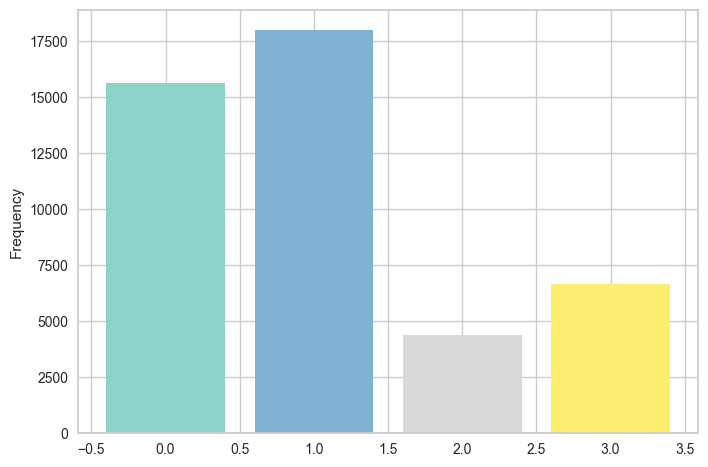

In [42]:

K = 4

kmeans_pca = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_pca = kmeans_pca.fit_predict(df_quanti)

# ----- #

cmap = plt.get_cmap('Set3',K)
plt.bar(*np.unique(clusters_pca, return_counts=True), color=cmap.colors)
plt.ylabel("Frequency")
plt.show()

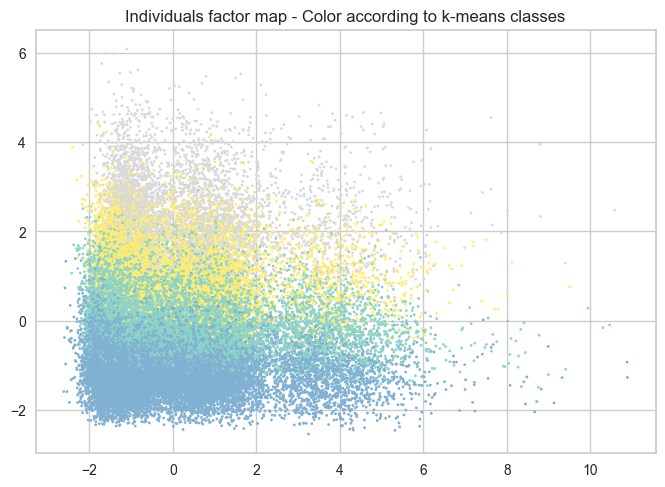

In [43]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters_pca, s=1, linewidths=1, cmap=cmap)
plt.title("Individuals factor map - Color according to k-means classes")

plt.grid(True)
plt.show()

In [68]:
y = clusters_pca
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X_scaled, y)
print(f"centroides shape: {lda.means_.shape}")
print(f"X_lda shape:      {X_lda.shape}")

centroides shape: (4, 8)
X_lda shape:      (44653, 3)


In [70]:
def plot_lda(axe1, axe2, lda=lda, X_lda=X_lda, y=y, cmap=cmap):
    plt.scatter(X_lda[:,axe1], X_lda[:,axe2], c=y, cmap=cmap)
    for i,j in enumerate(lda.means_[axe1], lda.means_[axe2]):
        plt.scatter(i, j, marker="X")

TypeError: only integer scalar arrays can be converted to a scalar index

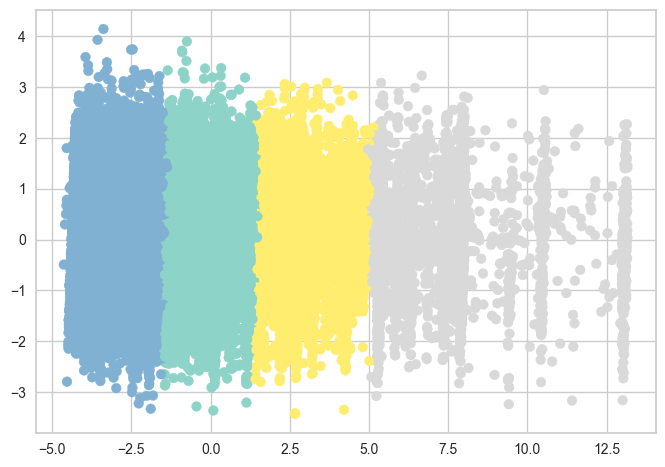

In [71]:
# plt.scatter(X_lda[:,0], X_lda[:,1], c=clusters_pca, cmap=cmap)
plot_lda(0,2)

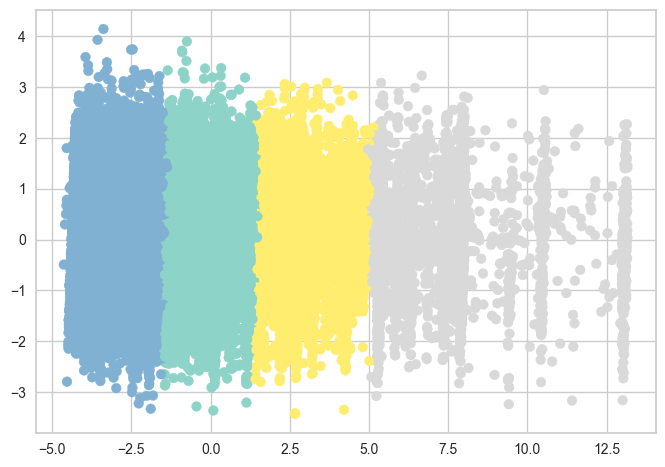

In [55]:
plt.scatter(X_lda[:,0], X_lda[:,2], c=clusters_pca, cmap=cmap)

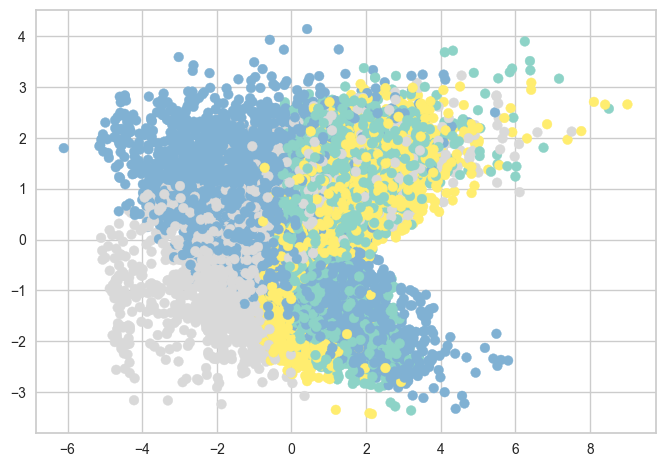

In [56]:
plt.scatter(X_lda[:,1], X_lda[:,2], c=clusters_pca, cmap=cmap)

### Choice of number of classes

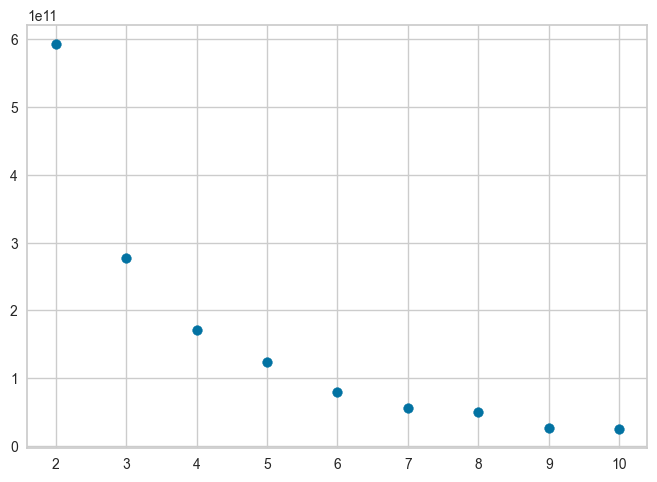

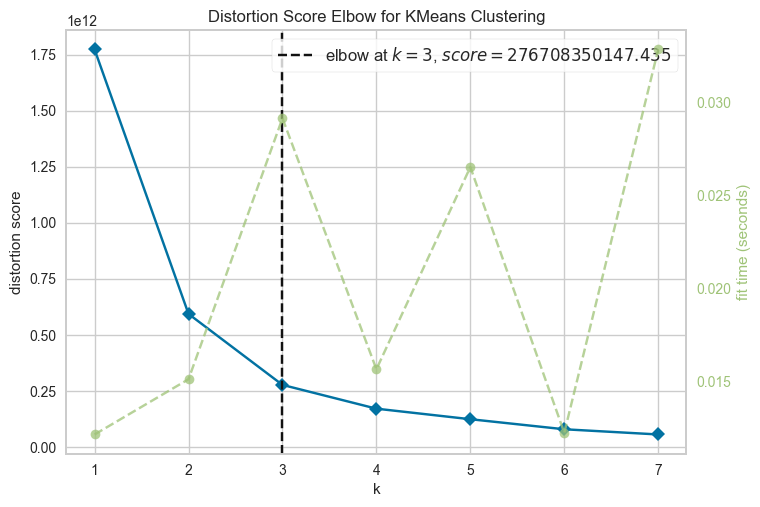

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
# By hand

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    kmeans.fit(df_quanti)
    inertia.append(kmeans.inertia_)
inertia = np.array(inertia)

plt.scatter(range(2, 11), inertia[1:])
plt.show()


# --- #


# Using yellowbrick

kmeans = KMeans(init='k-means++', n_init='auto', max_iter=100, random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(1,8))

visualizer.fit(df_quanti)    # Fit the data to the visualizer
visualizer.show()    # Finalize and render the figure

**Comment**: The score elbow criteria suggests 3 classes.

NameError: name 'KMeans' is not defined

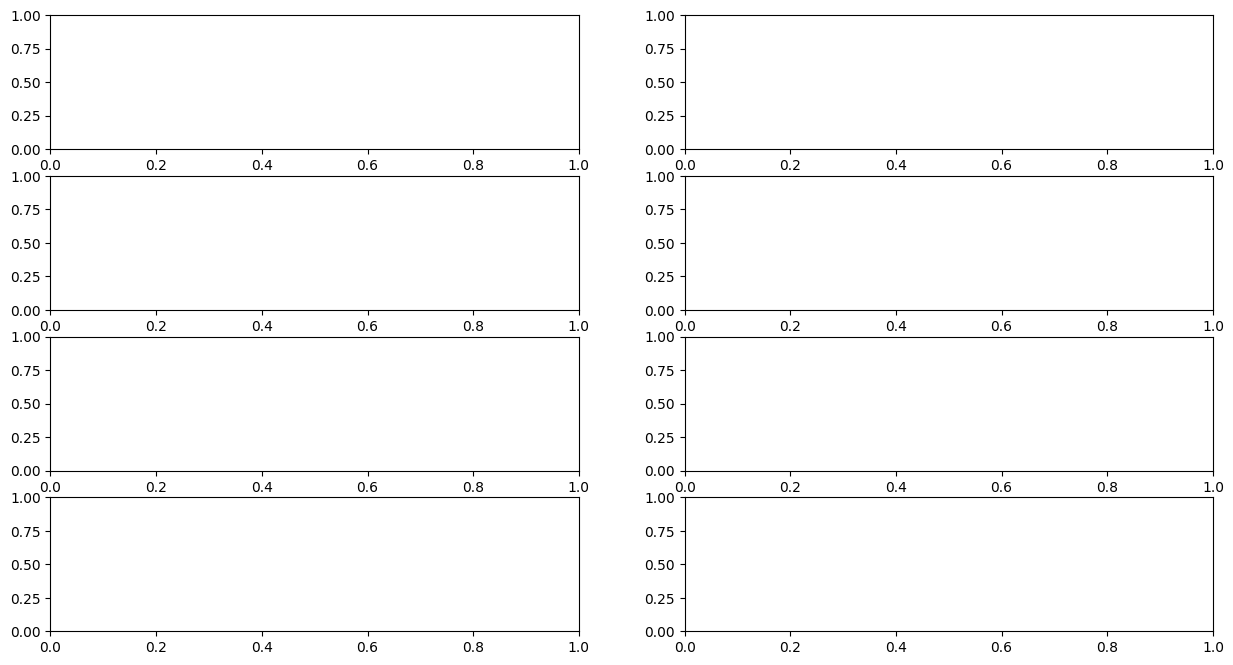

In [189]:
fig, ax = plt.subplots(4, 2, figsize=(15,8))

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init='auto', max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    
    # Create SilhouetteVisualizer instance with KMeans instance
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df_quanti)

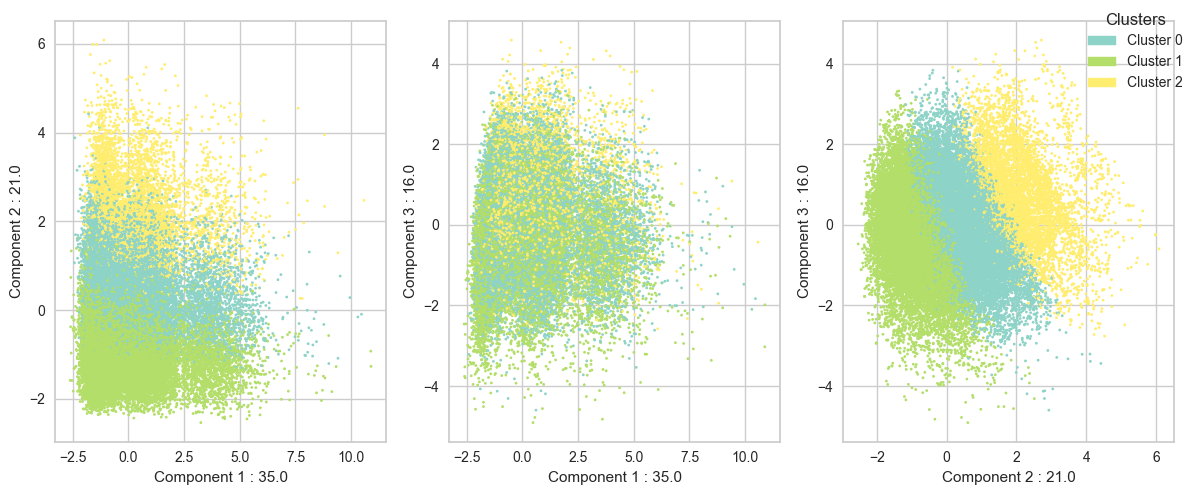

In [72]:
import matplotlib.patches as mpatches
import matplotlib.cm as cm

cmap = plt.get_cmap("Set3", K)  # Choose a colormap with K clusters
colors = [cmap(i/K) for i in range(K)]  # Generate distinct colors
K = 3

kmeans = KMeans(n_clusters=K, init='k-means++', n_init='auto', random_state=0)
clusters_kmeans = kmeans.fit_predict(df_quanti)


fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[:,0],X_pca[:,1],c= clusters_kmeans, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],c=clusters_kmeans, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],c=clusters_kmeans, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

**Comment**: The classes are separated more or less after the component 2 that is contributed mostly by amnt and percentage.

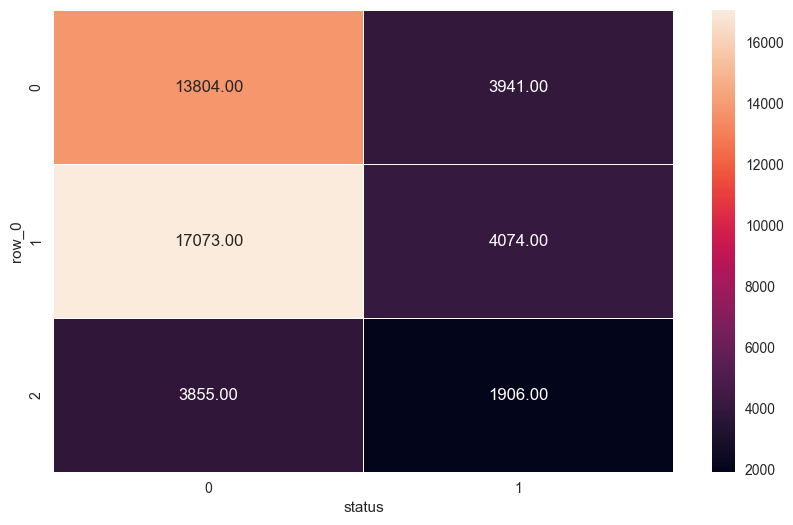

In [57]:
cluster_status = pd.crosstab(clusters_pca, df_quali['status'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_status, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

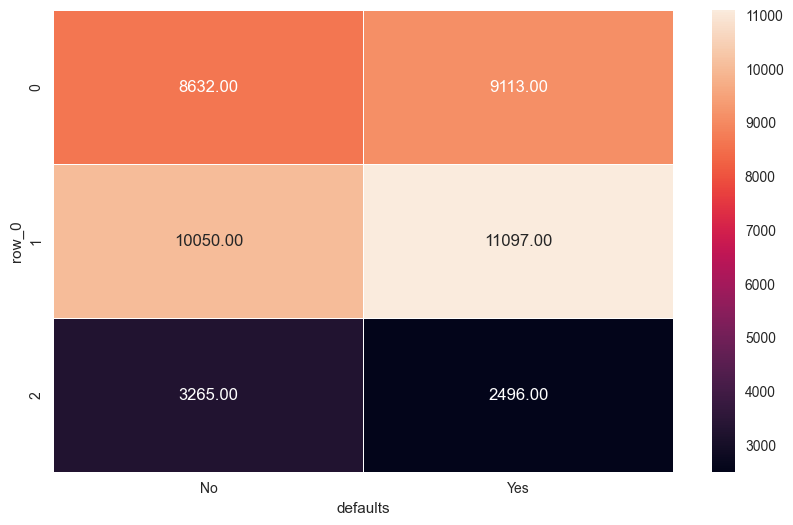

In [58]:
cluster_defaults = pd.crosstab(clusters_pca, df_quali['defaults'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_defaults, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

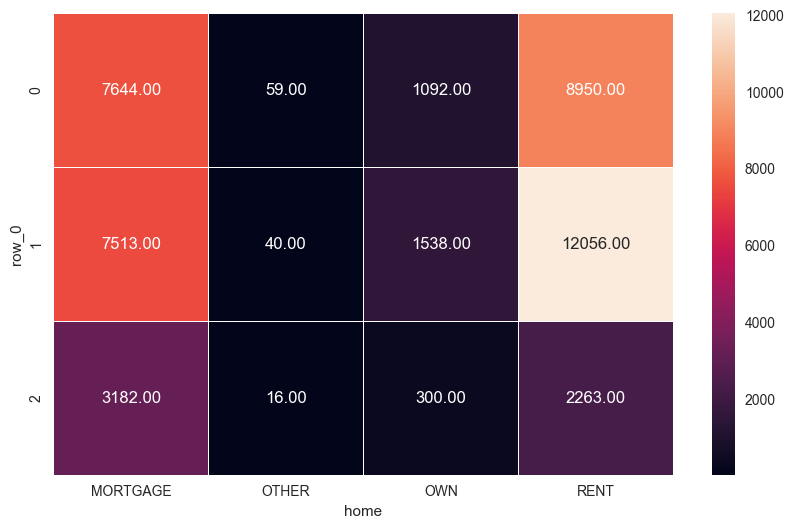

In [59]:
cluster_home = pd.crosstab(clusters_pca, df_quali['home'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_home, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

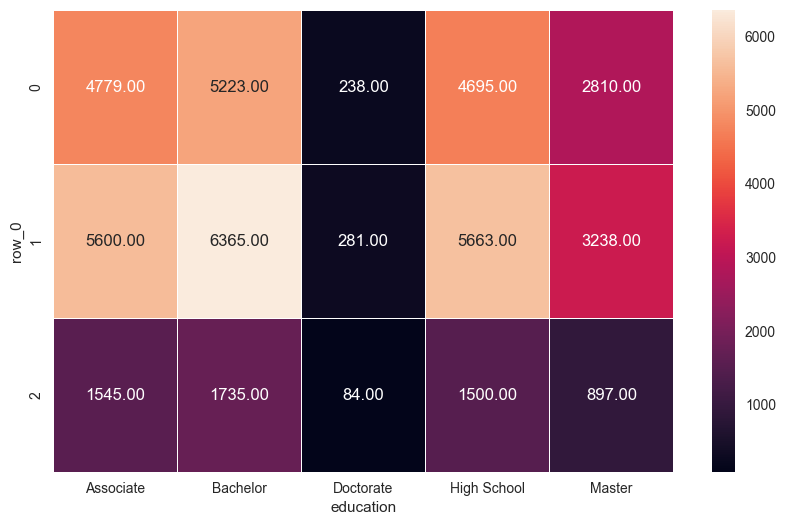

In [60]:
cluster_education = pd.crosstab(clusters_pca, df_quali['education'])
plt.figure(figsize = (10,6))
sns.heatmap(cluster_education, annot = True, fmt='.2f',linewidths=0.5)
plt.show()

**Comment**: I do not observe any link between the classes and the categorical variables

## Agglomerative Clustering

In [70]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

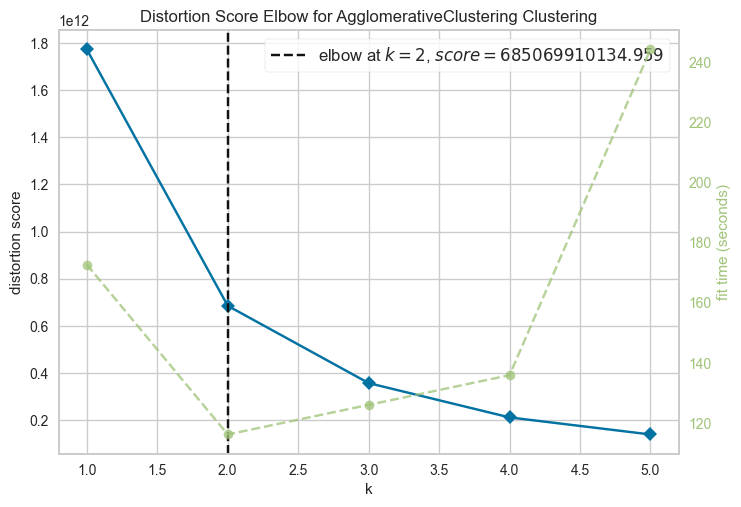

In [66]:
ac = AgglomerativeClustering(linkage='ward', compute_distances=True)
visualizer = KElbowVisualizer(ac, k=(1,6))

visualizer.fit(df_quanti)  # Fit the data to the visualizer
visualizer.show()   
plt.show()

In [71]:
K = 3

ac = AgglomerativeClustering(n_clusters=K, compute_distances=True, linkage='ward')
clusters_ac = ac.fit(df_quanti)

# children = ac.children_
# distances = ac.distances_
# n_observations = np.arange(2, children.shape[0]+2)
# linkage_matrix = np.c_[children, distances, n_observations]

# sch.dendrogram(linkage_matrix, labels=ac.labels_)

# # Cutting the dendrogram to get K classes
# max_d = .5*(ac.distances_[-K]+ac.distances_[-K+1])
# plt.axhline(y=max_d, c='k')

# plt.title("Dendrogram with Ward linkage")
# plt.show()

KeyboardInterrupt: 

In [ ]:

fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[:,0],X_pca[:,1],c= clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],c=clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],c=clusters_ac, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

## Gaussien Mixture Model

In [ ]:
def plotGMM(gmm, data, n_clusters=6):
    gmm.fit(data)
    clusters_gmm = gmm.predict(data)
    
    ax = plt.gca()
    ax.axis('equal')
    cmap = plt.get_cmap('Set3', n_clusters)
    
    # plot the input data
    ax.scatter(data[:, 0], data[:, 1], c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
    
    # w_factor = 0.2 / gmm.weights_.max()
    for i in range(n_clusters):
        mean = gmm.means_[i,:2]
        covariance = gmm.covariances_[i,:2,:2]
        w = gmm.weights_[i]
        draw_ellipse(mean, covariance, w, ax, cmap.colors[i])

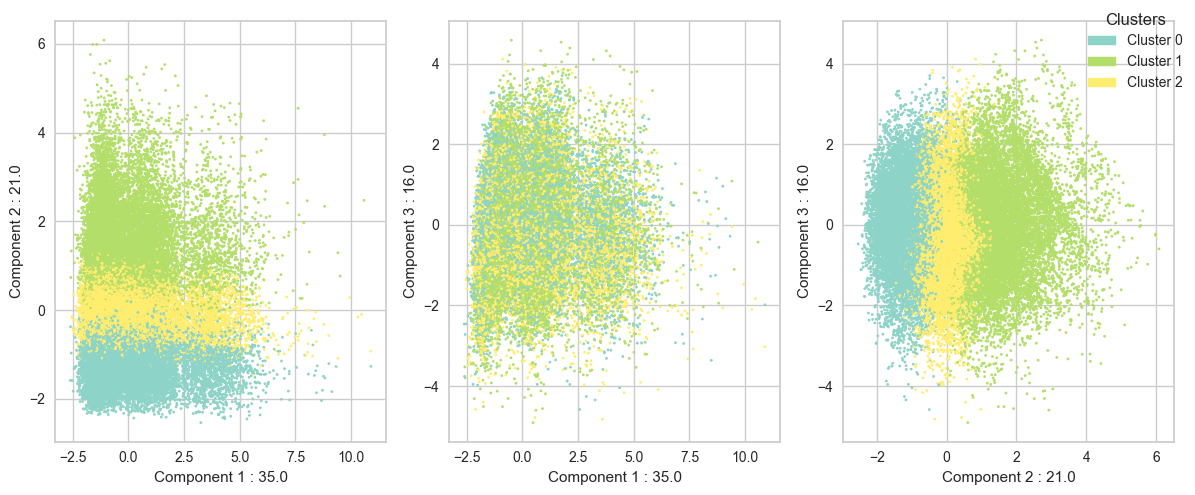

In [68]:
from sklearn.mixture import GaussianMixture

K = 3

gmm = GaussianMixture(n_components=K, n_init=3)
clusters_gmm = gmm.fit_predict(df_quanti)

# --- #
fig,axs = plt.subplots(1,3,figsize=(12,5))

sc=axs[0].scatter(X_pca[:,0],X_pca[:,1],c= clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[0].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[0].set_ylabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")

axs[1].scatter(X_pca[:,0],X_pca[:,2],c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[1].set_xlabel(f"Component 1 : {np.round(pca.explained_variance_ratio_[0]*100.0)}")
axs[1].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")

axs[2].scatter(X_pca[:,1],X_pca[:,2],c=clusters_gmm, s=1, linewidths=1, cmap=cmap)
axs[2].set_xlabel(f"Component 2 : {np.round(pca.explained_variance_ratio_[1]*100.0)}")
axs[2].set_ylabel(f"Component 3 : {np.round(pca.explained_variance_ratio_[2]*100.0)}")


# patches = [mpatches.Patch(color=colors[i], label=f"Cluster {i}") for i in range(K)]
fig.legend(handles=patches, title="Clusters", loc="upper right")
plt.tight_layout()
plt.grid(True)
plt.show()

## Commparing Kmean vs GMM

In [75]:
def matchClasses(classif1, classif2):
    cm = confusion_matrix(classif1, classif2)
    K = cm.shape[0]
    a, b = np.zeros(K), np.zeros(K)
    for j in range(K):
        for i in range(K):
            if (a[j] < cm[i,j]):
                a[j] = cm[i,j]
                b[j] = i 
    a = a.astype(int)
    b = b.astype(int)
                                             
    print ("")
    print ("Classes size:", a)
    print ("Class (in the classif1 numbering):", b)
    print ("")
    
    table = cm.copy()
    for i in range(K):
        table[:,b[i]] = cm[:,i]   
        
    clusters = classif2.copy()
    n = classif2.shape[0]
    for i in range(n):
        for j in range(K):
            if (classif2[i] == j):
                clusters[i] = b[j]
        
    return table, clusters

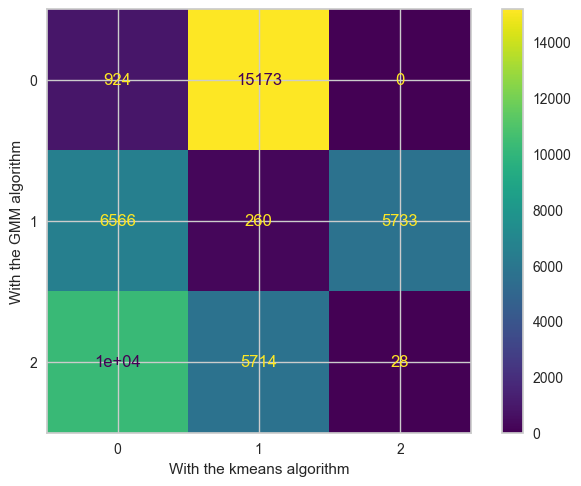


Classes size: [10255 15173  5733]
Class (in the classif1 numbering): [2 0 1]



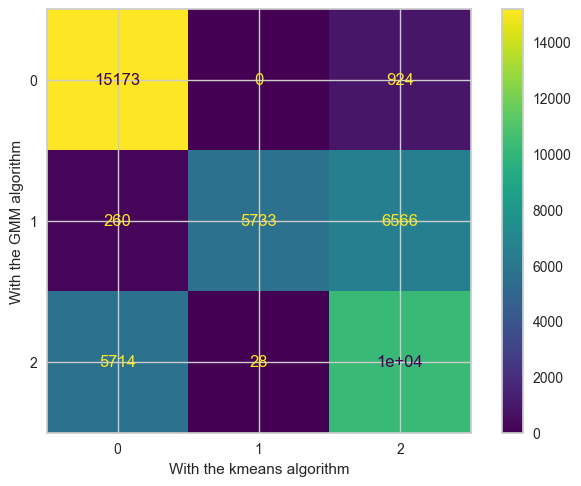

In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix(clusters_gmm, clusters_kmeans)).plot()

plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')
plt.show()

# --- #

cm, clusters_kmeans_sorted = matchClasses(clusters_gmm, clusters_kmeans)

ConfusionMatrixDisplay(cm).plot()
plt.xlabel('With the kmeans algorithm')
plt.ylabel('With the GMM algorithm')
plt.show()

In [80]:
kmeans_gmm = pd.crosstab(clusters_kmeans, clusters_gmm)
ca = prince.CA(n_components=2)
ca = ca.fit(kmeans_gmm)


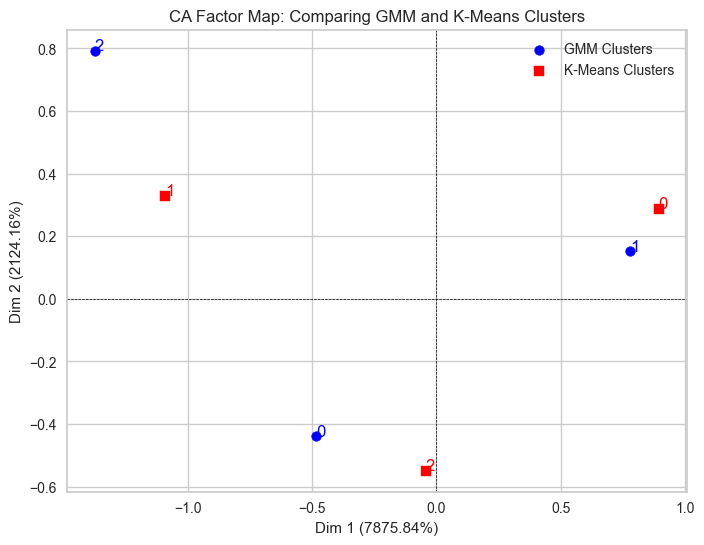

In [84]:
# Get row (true labels) and column (predicted clusters) coordinates
row_coords = ca.row_coordinates(kmeans_gmm)
col_coords = ca.column_coordinates(kmeans_gmm)

# Initialize the plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot row points (GMM Clusters)
ax.scatter(row_coords[0], row_coords[1], color='blue', label="GMM Clusters", marker="o")

# Plot column points (K-Means Clusters)
ax.scatter(col_coords[0], col_coords[1], color='red', label="K-Means Clusters", marker="s")

# Add text labels for row points (GMM)
for i, txt in enumerate(kmeans_gmm.index):
    ax.text(row_coords.iloc[i, 0], row_coords.iloc[i, 1], str(txt), fontsize=12, color='blue')

# Add text labels for column points (K-Means)
for i, txt in enumerate(kmeans_gmm.columns):
    ax.text(col_coords.iloc[i, 0], col_coords.iloc[i, 1], str(txt), fontsize=12, color='red')

# Formatting
ax.axhline(0, color='black', linewidth=0.5, linestyle="dashed")
ax.axvline(0, color='black', linewidth=0.5, linestyle="dashed")
ax.set_xlabel(f"Dim 1 ({np.round(ca.percentage_of_variance_[0]*100, 2)}%)")
ax.set_ylabel(f"Dim 2 ({np.round(ca.percentage_of_variance_[1]*100, 2)}%)")
ax.set_title("CA Factor Map: Comparing GMM and K-Means Clusters")
ax.legend()
plt.grid(True)

# Show plot
plt.show()
